In [1]:
# Find similar districts within the state
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the csv file
data = pd.read_csv('merged_data_full(2012-2022).csv')

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

features = data[['year', 'total_pop', 'white_pct', 'black_pct', 'asian_pct', 'hispanic_pct', 
                 'male_pct', 'female_pct', 'employed_pct', 'not_in_labor_force_pct', 'median_income', 
                 'hs_graduate_pct', 'higher_education_pct', 'homeownership_pct', 'renting_pct', 
                 'health_insurance_pct', 'kids_under_18_pct', 'young_voter_pct', 
                 'old_voter_pct']]

features_normalized = (features - features.mean()) / features.std()

# Filter data to get only Texas District 22 in 2022 as the reference point
district_22_2022_index = data[(data['NAME'] == 'Congressional District 22 (118th Congress), Texas') & (data['year'] == 2022)].index[0]

# Compute cosine similarity between Texas District 22 in 2022 and all other districts
similarity_scores = cosine_similarity(features_normalized.iloc[[district_22_2022_index]], features_normalized).flatten()

# Create a DataFrame of similarities with district names
similarity_df = pd.DataFrame({
    'District': data['NAME'],
    'Year': data['year'],
    'Similarity to District 22 (Texas) in 2022': similarity_scores
})

# Sort by similarity scores in descending order
similarity_df = similarity_df.sort_values(by='Similarity to District 22 (Texas) in 2022', ascending=False)

                                               District  Year  \
2089  Congressional District 22 (118th Congress), Texas  2022   
2069   Congressional District 2 (118th Congress), Texas  2022   
2075   Congressional District 8 (118th Congress), Texas  2022   
2202  Congressional District 42 (116th Congress), Ca...  2020   
2518  Congressional District 22 (116th Congress), Texas  2020   
2093  Congressional District 26 (118th Congress), Texas  2022   
2070   Congressional District 3 (118th Congress), Texas  2022   
2546  Congressional District 10 (116th Congress), Vi...  2020   
2071   Congressional District 4 (118th Congress), Texas  2022   
1661  Congressional District 22 (116th Congress), Texas  2018   
2119  Congressional District 10 (118th Congress), Vi...  2022   
1689  Congressional District 10 (116th Congress), Vi...  2018   
1723  Congressional District 5 (118th Congress), Ari...  2022   
1345  Congressional District 42 (116th Congress), Ca...  2018   
2219  Congressional Distr

Below, we tried extracting congressional district elections from open.fec.gov, however, we later found out that we could simply extract the information from MIT's datahub.

In [ ]:
import requests

api_key = "NS1fyQ5bOgdZsxmiaD1bboDc9VFiTh8fRzteJNGr"
url = "https://api.open.fec.gov/v1/elections/"

# Districts and years to fetch data for
districts_to_fetch = [
    {"district": "22", "state": "TX", "year": 2022},
    {"district": "4", "state": "TX", "year": 2022},
    {"district": "2", "state": "TX", "year": 2022},
    {"district": "26", "state": "TX", "year": 2022},
    {"district": "3", "state": "TX", "year": 2022},
    {"district": "10", "state": "VA", "year": 2022},
    {"district": "22", "state": "TX", "year": 2018},
    {"district": "8", "state": "TX", "year": 2022},
    {"district": "10", "state": "VA", "year": 2018},
    {"district": "3", "state": "TX", "year": 2018},
    {"district": "11", "state": "IL", "year": 2022},
    {"district": "7", "state": "VA", "year": 2022},
    {"district": "2", "state": "TX", "year": 2018},
    {"district": "11", "state": "VA", "year": 2018},
    {"district": "10", "state": "VA", "year": 2016},
    {"district": "6", "state": "NJ", "year": 2022},
    {"district": "6", "state": "CO", "year": 2018},
    {"district": "22", "state": "TX", "year": 2016},
    {"district": "22", "state": "TX", "year": 2014},
    {"district": "6", "state": "GA", "year": 2022},
    {"district": "5", "state": "AZ", "year": 2022},
    {"district": "3", "state": "TX", "year": 2016},
    {"district": "10", "state": "TX", "year": 2018},
    {"district": "24", "state": "TX", "year": 2022},
    {"district": "7", "state": "GA", "year": 2018},
    {"district": "8", "state": "IL", "year": 2022},
    {"district": "7", "state": "GA", "year": 2022},
    {"district": "6", "state": "MD", "year": 2022},
    {"district": "7", "state": "GA", "year": 2016},
    {"district": "11", "state": "VA", "year": 2022},
    {"district": "26", "state": "TX", "year": 2018},
    {"district": "11", "state": "VA", "year": 2016},
    {"district": "12", "state": "TX", "year": 2022},
    {"district": "38", "state": "TX", "year": 2022},
    {"district": "6", "state": "CO", "year": 2016},
    {"district": "17", "state": "NY", "year": 2022},
    {"district": "10", "state": "CA", "year": 2022},
    {"district": "10", "state": "TX", "year": 2022},
    {"district": "15", "state": "CA", "year": 2018},
    {"district": "10", "state": "TX", "year": 2016},
    {"district": "10", "state": "VA", "year": 2014},
    {"district": "12", "state": "NJ", "year": 2022},
    {"district": "19", "state": "CA", "year": 2018},
    {"district": "24", "state": "TX", "year": 2018},
    {"district": "5", "state": "NJ", "year": 2022},
    {"district": "3", "state": "MD", "year": 2022},
    {"district": "6", "state": "MD", "year": 2018},
    {"district": "19", "state": "CA", "year": 2016},
    {"district": "2", "state": "NC", "year": 2022},
    {"district": "1", "state": "WA", "year": 2022},
    {"district": "31", "state": "TX", "year": 2022},
    {"district": "4", "state": "UT", "year": 2022},
    {"district": "8", "state": "WA", "year": 2022},
    {"district": "11", "state": "NJ", "year": 2022},
    {"district": "6", "state": "GA", "year": 2018},
    {"district": "10", "state": "IL", "year": 2022},
    {"district": "6", "state": "PA", "year": 2022},
    {"district": "1", "state": "VA", "year": 2018},
    {"district": "3", "state": "MA", "year": 2022},
    {"district": "3", "state": "UT", "year": 2022},
    {"district": "3", "state": "MA", "year": 2018},
    {"district": "32", "state": "TX", "year": 2022},
    {"district": "15", "state": "CA", "year": 2016},
    {"district": "26", "state": "CA", "year": 2022},
    {"district": "7", "state": "TX", "year": 2022},
    {"district": "4", "state": "NY", "year": 2022},
    {"district": "6", "state": "CO", "year": 2022},
    {"district": "14", "state": "IL", "year": 2022},
    {"district": "9", "state": "WA", "year": 2022},
    {"district": "45", "state": "CA", "year": 2018},
    {"district": "42", "state": "CA", "year": 2018},
    {"district": "9", "state": "WA", "year": 2018},
    {"district": "2", "state": "TX", "year": 2016},
    {"district": "32", "state": "CA", "year": 2022},
    {"district": "11", "state": "VA", "year": 2014},
    {"district": "1", "state": "WA", "year": 2018},
    {"district": "9", "state": "CA", "year": 2022},
    {"district": "3", "state": "TX", "year": 2014},
    {"district": "1", "state": "UT", "year": 2022},
    {"district": "3", "state": "KS", "year": 2018},
    {"district": "17", "state": "CA", "year": 2018},
    {"district": "11", "state": "CA", "year": 2018},
    {"district": "17", "state": "NY", "year": 2018},
    {"district": "21", "state": "TX", "year": 2022},
    {"district": "47", "state": "CA", "year": 2022},
    {"district": "17", "state": "CA", "year": 2022},
    {"district": "16", "state": "CA", "year": 2022},
    {"district": "11", "state": "IL", "year": 2018},
    {"district": "5", "state": "TN", "year": 2022},
    {"district": "7", "state": "TX", "year": 2016},
    {"district": "14", "state": "CA", "year": 2018},
    {"district": "18", "state": "CA", "year": 2018},
    {"district": "2", "state": "UT", "year": 2022},
    {"district": "26", "state": "TX", "year": 2016},
    {"district": "13", "state": "NC", "year": 2022},
    {"district": "14", "state": "CA", "year": 2022},
    {"district": "8", "state": "VA", "year": 2022},
    {"district": "31", "state": "TX", "year": 2018},
    {"district": "32", "state": "TX", "year": 2018},
    {"district": "51", "state": "CA", "year": 2022}
]

# List to store results
all_results = []

# Loop over each district and year
for item in districts_to_fetch:
    params = {
        "api_key": api_key,
        "office": "house",  # 'house' for House of Representatives
        "state": item["state"],
        "district": item["district"],
        "cycle": item["year"],
    }

    # Make the request
    response = requests.get(url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        
        # Check if results are available
        if "results" in data and data["results"]:
            all_results.extend(data["results"])
            print(f"Fetched data for {item['state']} District {item['district']} in {item['year']}")
        else:
            print(f"No results for {item['state']} District {item['district']} in {item['year']}")
    else:
        print(f"Failed to fetch data for {item['state']} District {item['district']} in {item['year']}")
    
    # Pause to avoid rate limiting
    time.sleep(0.5)  # Adjust based on API limits

# Convert the list of results into a DataFrame
results_df = pd.DataFrame(all_results)

# Save results to CSV
results_df.to_csv("specified_texas_districts_elections.csv", index=False)

# Display the data
print(results_df.head())

Fetched data for TX District 22 in 2022
Fetched data for TX District 4 in 2022
Fetched data for TX District 2 in 2022
Fetched data for TX District 26 in 2022
Fetched data for TX District 3 in 2022
Fetched data for VA District 10 in 2022
Fetched data for TX District 22 in 2018
Fetched data for TX District 8 in 2022
Fetched data for VA District 10 in 2018
Fetched data for TX District 3 in 2018
Fetched data for IL District 11 in 2022
Fetched data for VA District 7 in 2022
Fetched data for TX District 2 in 2018
Fetched data for VA District 11 in 2018
Fetched data for VA District 10 in 2016
Fetched data for NJ District 6 in 2022
Fetched data for CO District 6 in 2018
Fetched data for TX District 22 in 2016
Fetched data for TX District 22 in 2014
Fetched data for GA District 6 in 2022
Fetched data for AZ District 5 in 2022
Fetched data for TX District 3 in 2016
Fetched data for TX District 10 in 2018
Fetched data for TX District 24 in 2022
Fetched data for GA District 7 in 2018
Fetched data 

In [ ]:
# Load data
data = pd.read_csv("specified_districts_elections.csv")

filtered_data = data[['candidate_election_year', 'candidate_id', 'party_full']].copy()

def extract_district(candidate_id):
    state = candidate_id[2:4]
    district = candidate_id[4:6].lstrip("0")  # Strip leading zero
    return state, district

# Apply the function to each row and split into separate columns using .loc to avoid warnings
filtered_data[['state', 'district']] = filtered_data['candidate_id'].apply(lambda x: pd.Series(extract_district(x)))
filtered_data.loc[:, 'year'] = filtered_data['candidate_election_year']
filtered_data.loc[:, 'representing_party'] = filtered_data['party_full']

# Keep only the required columns
filtered_data_representatives = filtered_data[['state', 'district', 'year', 'representing_party']]
filtered_data_representatives.head()

,state,district,year,representing_party
0,TX,4,2022,REPUBLICAN PARTY
1,TX,4,2022,REPUBLICAN PARTY
2,TX,4,2022,DEMOCRATIC PARTY
3,TX,4,2022,REPUBLICAN PARTY
4,TX,4,2022,DEMOCRATIC PARTY


In [21]:
state_abbreviations = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

filtered_data_representatives['state'] = filtered_data_representatives['state'].map(state_abbreviations)
filtered_data_representatives.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_52560\3911437187.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_representatives['state'] = filtered_data_representatives['state'].map(state_abbreviations)


,state,district,year,representing_party
0,Texas,4,2022,REPUBLICAN PARTY
1,Texas,4,2022,REPUBLICAN PARTY
2,Texas,4,2022,DEMOCRATIC PARTY
3,Texas,4,2022,REPUBLICAN PARTY
4,Texas,4,2022,DEMOCRATIC PARTY


In [22]:
demographics_data = pd.read_csv('dataset(2012-2022).csv')
filtered_election_data = filtered_data_representatives

# Function to create the merge condition
demographics_data[['district', 'state']] = demographics_data['NAME'].str.extract(
    r'District\s(\d+|at Large).*Congress\),\s([A-Za-z\s]+)'
)

# Merge demographics data with election data
merged_data = pd.merge(
    filtered_election_data,
    demographics_data,
    how='inner',
    left_on=['state', 'district', 'year'],
    right_on=['state', 'district', 'year']
)

# Display the result
merged_data.head()

,state,district,year,representing_party,GEOID,NAME,total_pop,white_pct,black_pct,asian_pct,...,median_income,hs_graduate_pct,some_college_pct,associates_pct,bachelors_pct,grad_prof_pct,health_insurance_pct,kids_under_18_pct,young_voter_pct,old_voter_pct
0,Texas,4,2022,REPUBLICAN PARTY,4804,"Congressional District 4 (118th Congress), Texas",817813,0.625924,0.092736,0.122714,...,92686,0.148046,0.124861,0.053663,0.190144,0.117088,0.985307,0.241025,0.415228,0.445793
1,Texas,4,2022,REPUBLICAN PARTY,4804,"Congressional District 4 (118th Congress), Texas",817813,0.625924,0.092736,0.122714,...,92686,0.148046,0.124861,0.053663,0.190144,0.117088,0.985307,0.241025,0.415228,0.445793
2,Texas,4,2022,DEMOCRATIC PARTY,4804,"Congressional District 4 (118th Congress), Texas",817813,0.625924,0.092736,0.122714,...,92686,0.148046,0.124861,0.053663,0.190144,0.117088,0.985307,0.241025,0.415228,0.445793
3,Texas,4,2022,REPUBLICAN PARTY,4804,"Congressional District 4 (118th Congress), Texas",817813,0.625924,0.092736,0.122714,...,92686,0.148046,0.124861,0.053663,0.190144,0.117088,0.985307,0.241025,0.415228,0.445793
4,Texas,4,2022,DEMOCRATIC PARTY,4804,"Congressional District 4 (118th Congress), Texas",817813,0.625924,0.092736,0.122714,...,92686,0.148046,0.124861,0.053663,0.190144,0.117088,0.985307,0.241025,0.415228,0.445793


In [23]:
filtered_data_representatives.head()

,state,district,year,representing_party
0,Texas,4,2022,REPUBLICAN PARTY
1,Texas,4,2022,REPUBLICAN PARTY
2,Texas,4,2022,DEMOCRATIC PARTY
3,Texas,4,2022,REPUBLICAN PARTY
4,Texas,4,2022,DEMOCRATIC PARTY


In [24]:
import pandas as pd
import numpy as np

# Encode representing_party as binary: 1 for Democratic, 0 for Republican
merged_data['party_label'] = merged_data['representing_party'].apply(lambda x: 1 if x == 'DEMOCRATIC PARTY' else 0)

# Select demographic features for analysis
demographic_features = [
    'total_pop', 'white_pct', 'black_pct', 'asian_pct', 'hispanic_pct',
    'male_pct', 'female_pct', 'employed_pct', 'not_in_labor_force_pct',
    'median_income', 'hs_graduate_pct', 'some_college_pct', 'associates_pct',
    'bachelors_pct', 'grad_prof_pct', 'health_insurance_pct', 
    'kids_under_18_pct', 'young_voter_pct', 'old_voter_pct'
]

# Compute correlation matrix between demographic features and party_label
democrat_correlations = merged_data[demographic_features + ['party_label']].corr()['party_label']

# # Sort correlations in descending order and get top 3 features
top_15_features_democrats = democrat_correlations.drop('party_label').nlargest(15)

# Display the top 3 features with their correlation values
print("Features associated with democratic party:")
print(top_15_features_democrats)


Features associated with democratic party:
white_pct                 0.331285
total_pop                 0.236356
asian_pct                 0.172690
kids_under_18_pct         0.158315
employed_pct              0.145655
grad_prof_pct             0.113814
health_insurance_pct      0.095541
female_pct                0.078507
bachelors_pct             0.038876
young_voter_pct          -0.010065
hispanic_pct             -0.026148
median_income            -0.062917
male_pct                 -0.078507
some_college_pct         -0.083387
not_in_labor_force_pct   -0.096270
Name: party_label, dtype: float64


In [25]:
import pandas as pd
import numpy as np

# Encode representing_party as binary: 1 for Democratic, 0 for Republican
merged_data['party_label'] = merged_data['representing_party'].apply(lambda x: 1 if x == 'REPUBLICAN PARTY' else 0)

# Select demographic features for analysis
demographic_features = [
    'total_pop', 'white_pct', 'black_pct', 'asian_pct', 'hispanic_pct',
    'male_pct', 'female_pct', 'employed_pct', 'not_in_labor_force_pct',
    'median_income', 'hs_graduate_pct', 'some_college_pct', 'associates_pct',
    'bachelors_pct', 'grad_prof_pct', 'health_insurance_pct', 
    'kids_under_18_pct', 'young_voter_pct', 'old_voter_pct'
]

# Compute correlation matrix between demographic features and party_label
republican_correlations = merged_data[demographic_features + ['party_label']].corr()['party_label']

# # Sort correlations in descending order and get top 3 features
top_15_features_republicans = republican_correlations.drop('party_label').nlargest(15)

# Display the top 3 features with their correlation values
print("Features associated with republican party:")
print(top_15_features_republicans)


Features associated with republican party:
old_voter_pct             0.314941
hs_graduate_pct           0.167549
not_in_labor_force_pct    0.138991
male_pct                  0.138129
black_pct                 0.134608
median_income             0.112696
associates_pct            0.111014
some_college_pct          0.065016
hispanic_pct             -0.002222
young_voter_pct          -0.051086
bachelors_pct            -0.072856
grad_prof_pct            -0.122483
health_insurance_pct     -0.132289
female_pct               -0.138129
kids_under_18_pct        -0.150771
Name: party_label, dtype: float64


**********************************************************************************************************************************************************************************

# PRESIDENTIAL ELECTION OF DISTRICT

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the csv file
data = pd.read_csv('merged_data_full(2012-2022).csv')

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Filter data to include only rows for the year 2016 and 2020
data_filtered = data[data['year'].isin([2012, 2016, 2020])].reset_index(drop=True)

# Filter relevant columns
features = data_filtered[['year', 'total_pop', 'white_pct', 'black_pct', 'asian_pct', 'hispanic_pct', 
                 'male_pct', 'female_pct', 'employed_pct', 'not_in_labor_force_pct', 'median_income', 
                 'hs_graduate_pct', 'higher_education_pct', 'homeownership_pct', 'renting_pct', 
                 'health_insurance_pct', 'kids_under_18_pct', 'young_voter_pct', 
                 'old_voter_pct']]

# Normalize the features
features_normalized = (features - features.mean()) / features.std()
features_normalized = features_normalized.replace([np.inf, -np.inf], np.nan).fillna(0)

# Filter data to get only Texas District 22 in 2022 as the reference point
district_22_2022_row = data[(data['NAME'] == 'Congressional District 22 (118th Congress), Texas') & 
                            (data['year'] == 2022)]

# Ensure the reference point exists
if not district_22_2022_row.empty:
    # Normalize the 2022 row based on the mean and std of the features from 2016 data
    district_22_2022_normalized = (district_22_2022_row[features.columns] - features.mean()) / features.std()
    district_22_2022_normalized = district_22_2022_normalized.replace([np.inf, -np.inf], np.nan).fillna(0)
    
    # Compute cosine similarity between Texas District 22 in 2022 and all other districts in 2016 and 2020
    similarity_scores = cosine_similarity(district_22_2022_normalized, features_normalized).flatten()
    
    # Create a DataFrame of similarities with district names
    similarity_df = pd.DataFrame({
        'District': data_filtered['NAME'],
        'Year': data_filtered['year'],
        'Similarity to District 22 (Texas) in 2022': similarity_scores
    })
    
    # Sort by similarity scores in descending order
    similarity_df = similarity_df.sort_values(by='Similarity to District 22 (Texas) in 2022', ascending=False)
    
    # Display and save the top 50 most similar districts from 2016
    print(similarity_df[:50])
    similarity_df[:50].to_csv('top_50_similar_districts_to_texas_district_22_2022.csv', index=False)
else:
    print("Texas District 22 in 2022 was not found in the data. Please check the dataset for accuracy.")


                                               District  Year  \
917   Congressional District 42 (116th Congress), Ca...  2020   
1233  Congressional District 22 (116th Congress), Texas  2020   
1261  Congressional District 10 (116th Congress), Vi...  2020   
934   Congressional District 6 (116th Congress), Col...  2020   
833   Congressional District 10 (115th Congress), Vi...  2016   
1213   Congressional District 2 (116th Congress), Texas  2020   
1214   Congressional District 3 (116th Congress), Texas  2020   
1040  Congressional District 6 (116th Congress), Mar...  2020   
1237  Congressional District 26 (116th Congress), Texas  2020   
1221  Congressional District 10 (116th Congress), Texas  2020   
974   Congressional District 7 (116th Congress), Geo...  2020   
805   Congressional District 22 (115th Congress), Texas  2016   
1262  Congressional District 11 (116th Congress), Vi...  2020   
1270  Congressional District 8 (116th Congress), Was...  2020   
834   Congressional Distr

In [ ]:
# Load the CSV file
similarity_df = pd.read_csv('top_50_similar_districts_to_texas_district_22_2022.csv')

similarity_df['State'] = similarity_df['District'].str.extract(r'\((?:\d+th|at Large) Congress\), ([\w\s]+)')[0]

# Extract the unique states  and districts , and remove any NaN values
unique_states = similarity_df['State'].unique()

# Extract state-district tuples
state_district = similarity_df['District'].str.extract(r'District (\d+|at Large)')

In [ ]:
# Extract State and District number from the 'District' column
similarity_df['State'] = similarity_df['District'].str.extract(r', ([\w\s]+)$')[0]
similarity_df['District_Number'] = similarity_df['District'].str.extract(r'District (\d+)')

# Create a set of (State, District Number) tuples
state_district_tuples = set(zip(similarity_df['State'], similarity_df['District_Number'], similarity_df['Year']))

print(state_district_tuples)

{('Maryland', '6', 2020), ('Virginia', '7', 2020), ('Virginia', '1', 2020), ('Georgia', '7', 2016), ('Virginia', '11', 2016), ('California', '42', 2020), ('Illinois', '8', 2020), ('Colorado', '6', 2016), ('Texas', '22', 2016), ('California', '25', 2020), ('New York', '17', 2020), ('Illinois', '10', 2020), ('California', '18', 2020), ('Virginia', '10', 2020), ('Georgia', '6', 2020), ('Texas', '26', 2020), ('Colorado', '7', 2020), ('California', '50', 2020), ('North Carolina', '2', 2020), ('Texas', '3', 2020), ('California', '45', 2020), ('Texas', '25', 2020), ('Colorado', '4', 2020), ('Texas', '12', 2020), ('California', '15', 2020), ('Virginia', '10', 2016), ('California', '19', 2020), ('Utah', '4', 2020), ('Utah', '2', 2020), ('Washington', '1', 2020), ('Massachusetts', '3', 2020), ('Illinois', '11', 2020), ('Georgia', '7', 2020), ('Illinois', '14', 2020), ('Virginia', '11', 2020), ('Arizona', '5', 2020), ('Kansas', '3', 2020), ('Texas', '8', 2020), ('Texas', '22', 2020), ('Texas', '2

In [ ]:
# Sort and print state_district_tuples
sorted_state_district_tuples = sorted(state_district_tuples, key=lambda x: (x[0], int(x[1]), x[2]))
print(sorted_state_district_tuples)

[('Arizona', '5', 2020), ('California', '11', 2020), ('California', '15', 2020), ('California', '17', 2020), ('California', '18', 2020), ('California', '19', 2020), ('California', '25', 2020), ('California', '42', 2020), ('California', '45', 2020), ('California', '50', 2020), ('Colorado', '4', 2020), ('Colorado', '6', 2016), ('Colorado', '6', 2020), ('Colorado', '7', 2020), ('Georgia', '6', 2020), ('Georgia', '7', 2016), ('Georgia', '7', 2020), ('Illinois', '8', 2020), ('Illinois', '10', 2020), ('Illinois', '11', 2020), ('Illinois', '14', 2020), ('Kansas', '3', 2020), ('Maryland', '6', 2020), ('Maryland', '8', 2020), ('Massachusetts', '3', 2020), ('New York', '17', 2020), ('North Carolina', '2', 2020), ('Oregon', '1', 2020), ('Texas', '2', 2020), ('Texas', '3', 2016), ('Texas', '3', 2020), ('Texas', '6', 2020), ('Texas', '8', 2020), ('Texas', '10', 2020), ('Texas', '12', 2020), ('Texas', '22', 2016), ('Texas', '22', 2020), ('Texas', '25', 2020), ('Texas', '26', 2020), ('Texas', '31', 2

In [ ]:
print(f"Total number of similar districts: {len(state_district_tuples)}")

Total number of similar districts: 50


In [18]:
# Extract unique (state, year) pairs
set_state_years = set((state, year) for state, _, year in state_district_tuples)

# Print unique states and years
for state, year in sorted(set_state_years):
    print(f"State: {state}, Year: {year}")


State: Arizona, Year: 2020
State: California, Year: 2020
State: Colorado, Year: 2016
State: Colorado, Year: 2020
State: Georgia, Year: 2016
State: Georgia, Year: 2020
State: Illinois, Year: 2020
State: Kansas, Year: 2020
State: Maryland, Year: 2020
State: Massachusetts, Year: 2020
State: New York, Year: 2020
State: North Carolina, Year: 2020
State: Oregon, Year: 2020
State: Texas, Year: 2016
State: Texas, Year: 2020
State: Utah, Year: 2020
State: Virginia, Year: 2016
State: Virginia, Year: 2020
State: Washington, Year: 2020


These are the states that we need to download data for from redistrictingdatahub.org

ARIZONA

In [ ]:
import geopandas as gpd
import pandas as pd

# Load precinct and district shapefiles
precincts_gdf = gpd.read_file("precinct_data/az_vest_20/az_vest_20.shp")
congressional_gdf = gpd.read_file("congressional_data/az_cong_2012_to_2021/az_cong_2012_to_2021.shp")

# Filter columns of interest
presidential_columns = []

# loop over all columns that start with G20
for column in precincts_gdf.columns:
    if column.startswith('G20PRE'):
        presidential_columns.append(column)

# Extract Arizona districts from state_district_tuples
arizona_districts = [
    int(district) for state, district, year in state_district_tuples if state == "Arizona"
]

if precincts_gdf.crs != congressional_gdf.crs:
    precincts_gdf = precincts_gdf.to_crs(congressional_gdf.crs)

# Convert 'DISTRICT' column to integer
congressional_gdf['DISTRICT'] = congressional_gdf['DISTRICT'].astype(int)

# Loop over Arizona districts
for district_num in arizona_districts:
    # Filter the GeoDataFrame for the specific district number
    district_num_gdf = congressional_gdf[congressional_gdf['DISTRICT'] == district_num]

    # Check if the district exists
    if district_num_gdf.empty:
        print(f"District {district_num} not found in congressional_gdf. Skipping...")
        continue

    # Perform spatial join to find precincts within the current district
    precinct_districts_gdf = gpd.sjoin(
        precincts_gdf, district_num_gdf, how="inner", predicate="intersects"
    )

    # If the join result is empty, log a warning and skip
    if precinct_districts_gdf.empty:
        print(f"No precincts found within district {district_num}. Skipping...")
        continue

    # Group by 'DISTRICT' and list unique precincts ('PCTNUM') within each district
    district_precincts = precinct_districts_gdf.groupby('DISTRICT')['PCTNUM'].unique()

    # Find total votes for each candidate within the precincts of the current district
    district_results = precinct_districts_gdf[presidential_columns].sum()

    # Identify the winner and their vote count
    district_winner = district_results.idxmax()
    winner_votes = district_results.max()

    # Create a new DataFrame for the district precincts with results
    district_precincts_df = precinct_districts_gdf[['PCTNUM'] + presidential_columns].copy()
    district_precincts_df['Winner'] = district_winner
    district_precincts_df['Winner Votes'] = winner_votes

    # Save to a CSV file for the district
    district_precincts_df.to_csv(f"pres_results/district_{district_num}_precincts_2020.csv", index=False)

print("Precinct data for specified Arizona districts has been saved successfully.")

Precinct data for specified Arizona districts has been saved successfully.


CALIFORNIA

In [ ]:
import geopandas as gpd
import pandas as pd

# Load precinct and district shapefiles
precincts_gdf = gpd.read_file("precinct_data/ca_vest_20/ca_vest_20.shp")
congressional_gdf = gpd.read_file("congressional_data/ca_cong_2012_to_2021/ca_cong_2012_to_2021.shp")

# Filter columns of interest
presidential_columns = [col for col in precincts_gdf.columns if col.startswith('G20PRE')]

# Extract California districts from state_district_tuples
california_districts = [
    int(district) for state, district, year in state_district_tuples if state == "California"
]

# Ensure CRS match
if precincts_gdf.crs != congressional_gdf.crs:
    precincts_gdf = precincts_gdf.to_crs(congressional_gdf.crs)

# Convert 'DISTRICT' column to integer
congressional_gdf['DISTRICT'] = congressional_gdf['DISTRICT'].astype(int)

# Loop over California districts
for district_num in california_districts:
    # Filter the GeoDataFrame for the specific district number
    district_num_gdf = congressional_gdf[congressional_gdf['DISTRICT'] == district_num]

    # Check if the district exists
    if district_num_gdf.empty:
        print(f"District {district_num} not found in congressional_gdf. Skipping...")
        continue

    # Perform spatial join to find precincts within the current district
    precinct_districts_gdf = gpd.sjoin(
        precincts_gdf, district_num_gdf, how="inner", predicate="intersects"
    )

    # If the join result is empty, log a warning and skip
    if precinct_districts_gdf.empty:
        print(f"No precincts found within district {district_num}. Skipping...")
        continue

    # Group by 'DISTRICT' and list unique precincts ('SRPREC') within each district
    district_precincts = precinct_districts_gdf.groupby('DISTRICT')['SRPREC'].unique()

    # Find total votes for each candidate within the precincts of the current district
    district_results = precinct_districts_gdf[presidential_columns].sum()

    # Identify the winner and their vote count
    district_winner = district_results.idxmax()
    winner_votes = district_results.max()

    # Create a new DataFrame for the district precincts with results
    district_precincts_df = precinct_districts_gdf[['SRPREC'] + presidential_columns].copy()
    district_precincts_df['Winner'] = district_winner
    district_precincts_df['Winner Votes'] = winner_votes

    # Save to a CSV file for the district
    district_precincts_df.to_csv(f"pres_results/california_district_{district_num}_precincts_2020.csv", index=False)

print("Precinct data for specified California districts has been saved successfully.")

Precinct data for specified California districts has been saved successfully.


COLOARDO - 2016

In [ ]:
import geopandas as gpd
import pandas as pd

# Load precinct and district shapefiles
precincts_gdf = gpd.read_file("precinct_data/co_vest_16/co_vest_16.shp")
congressional_gdf = gpd.read_file("congressional_data/co_cong_2011_to_2021/co_cong_2011_to_2021.shp")

# Filter columns of interest
presidential_columns = [col for col in precincts_gdf.columns if col.startswith('G16PRE')]

# Extract Colorado districts from state_district_tuples
colorado_districts = [
    int(district) for state, district, year in state_district_tuples if state == "Colorado"
]

# Ensure CRS match
if precincts_gdf.crs != congressional_gdf.crs:
    precincts_gdf = precincts_gdf.to_crs(congressional_gdf.crs)

# Convert 'District_N' column to integer
congressional_gdf['District_N'] = congressional_gdf['District_N'].astype(int)

# Loop over Colorado districts
for district_num in colorado_districts:
    # Filter the GeoDataFrame for the specific district number
    district_num_gdf = congressional_gdf[congressional_gdf['District_N'] == district_num]

    # Check if the district exists
    if district_num_gdf.empty:
        print(f"District {district_num} not found in congressional_gdf. Skipping...")
        continue

    # Perform spatial join to find precincts within the current district
    precinct_districts_gdf = gpd.sjoin(
        precincts_gdf, district_num_gdf, how="inner", predicate="intersects"
    )

    # If the join result is empty, log a warning and skip
    if precinct_districts_gdf.empty:
        print(f"No precincts found within district {district_num}. Skipping...")
        continue

    # Group by 'District_N' and list unique precincts ('PRECINCT') within each district
    district_precincts = precinct_districts_gdf.groupby('District_N')['PRECINCT'].unique()

    # Find total votes for each candidate within the precincts of the current district
    district_results = precinct_districts_gdf[presidential_columns].sum()

    # Identify the winner and their vote count
    district_winner = district_results.idxmax()
    winner_votes = district_results.max()

    # Create a new DataFrame for the district precincts with results
    district_precincts_df = precinct_districts_gdf[['PRECINCT'] + presidential_columns].copy()
    district_precincts_df['Winner'] = district_winner
    district_precincts_df['Winner Votes'] = winner_votes

    # Save to a CSV file for the district
    district_precincts_df.to_csv(f"pres_results/colorado_district_{district_num}_precincts_2016.csv", index=False)

print("Precinct data for specified Colorado districts has been saved successfully.")

Precinct data for specified Colorado districts has been saved successfully.


COLORADO - 2020

In [ ]:
import geopandas as gpd
import pandas as pd

# Load precinct and district shapefiles
precincts_gdf = gpd.read_file("precinct_data/co_vest_20/co_vest_20.shp")
congressional_gdf = gpd.read_file("congressional_data/co_cong_2011_to_2021/co_cong_2011_to_2021.shp")

# Filter columns of interest
presidential_columns = [col for col in precincts_gdf.columns if col.startswith('G20PRE')]

# Extract Colorado districts from state_district_tuples
colorado_districts = [
    int(district) for state, district, year in state_district_tuples if state == "Colorado"
]

# Ensure CRS match
if precincts_gdf.crs != congressional_gdf.crs:
    precincts_gdf = precincts_gdf.to_crs(congressional_gdf.crs)

# Convert 'District_N' column to integer
congressional_gdf['District_N'] = congressional_gdf['District_N'].astype(int)

# Loop over Colorado districts
for district_num in colorado_districts:
    # Filter the GeoDataFrame for the specific district number
    district_num_gdf = congressional_gdf[congressional_gdf['District_N'] == district_num]

    # Check if the district exists
    if district_num_gdf.empty:
        print(f"District {district_num} not found in congressional_gdf. Skipping...")
        continue

    # Perform spatial join to find precincts within the current district
    precinct_districts_gdf = gpd.sjoin(
        precincts_gdf, district_num_gdf, how="inner", predicate="intersects"
    )

    # If the join result is empty, log a warning and skip
    if precinct_districts_gdf.empty:
        print(f"No precincts found within district {district_num}. Skipping...")
        continue

    # Group by 'District_N' and list unique precincts ('PRECINCT') within each district
    district_precincts = precinct_districts_gdf.groupby('District_N')['PRECINCT'].unique()

    # Find total votes for each candidate within the precincts of the current district
    district_results = precinct_districts_gdf[presidential_columns].sum()

    # Identify the winner and their vote count
    district_winner = district_results.idxmax()
    winner_votes = district_results.max()

    # Create a new DataFrame for the district precincts with results
    district_precincts_df = precinct_districts_gdf[['PRECINCT'] + presidential_columns].copy()
    district_precincts_df['Winner'] = district_winner
    district_precincts_df['Winner Votes'] = winner_votes

    # Save to a CSV file for the district
    district_precincts_df.to_csv(f"pres_results/colorado_district_{district_num}_precincts_2020.csv", index=False)

print("Precinct data for specified Colorado districts has been saved successfully.")

Precinct data for specified Colorado districts has been saved successfully.


GEORGIA - 2016

In [ ]:
import geopandas as gpd
import pandas as pd

# Load precinct and district shapefiles
precincts_gdf = gpd.read_file("precinct_data/ga_vest_16/ga_vest_16.shp")
congressional_gdf = gpd.read_file("congressional_data/ga_cong_2011_to_2021/ga_cong_2011_to_2021.shp")

# Filter columns of interest
presidential_columns = [col for col in precincts_gdf.columns if col.startswith('G16PRE')]

# Extract Georgia districts from state_district_tuples
georgia_districts = [
    int(district) for state, district, year in state_district_tuples if state == "Georgia"
]

# Ensure CRS match
if precincts_gdf.crs != congressional_gdf.crs:
    precincts_gdf = precincts_gdf.to_crs(congressional_gdf.crs)

# Convert 'DISTRICT' column to integer
congressional_gdf['DISTRICT'] = congressional_gdf['DISTRICT'].astype(int)

# Loop over Georgia districts
for district_num in georgia_districts:
    # Filter the GeoDataFrame for the specific district number
    district_num_gdf = congressional_gdf[congressional_gdf['DISTRICT'] == district_num]

    # Check if the district exists
    if district_num_gdf.empty:
        print(f"District {district_num} not found in congressional_gdf. Skipping...")
        continue

    # Perform spatial join to find precincts within the current district
    precinct_districts_gdf = gpd.sjoin(
        precincts_gdf, district_num_gdf, how="inner", predicate="intersects"
    )

    # Check spatial join result
    if precinct_districts_gdf.empty:
        print(f"No precincts found in District {district_num}. Skipping...")
        continue

    # Group by 'DISTRICT_right' (from congressional_gdf) and list unique precincts
    district_precincts = precinct_districts_gdf.groupby('DISTRICT_right')['PRECINCT_N'].unique()

    # Sum votes for each candidate within the district
    district_results = precinct_districts_gdf[presidential_columns].sum()

    # Identify the winner and their vote count
    district_winner = district_results.idxmax()
    winner_votes = district_results.max()

    # Create a DataFrame with results
    district_precincts_df = precinct_districts_gdf[['PRECINCT_N'] + presidential_columns].copy()
    district_precincts_df['Winner'] = district_winner
    district_precincts_df['Winner Votes'] = winner_votes

    # Save to a CSV file
    district_precincts_df.to_csv(f"pres_results/georgia_district_{district_num}_precincts_2016.csv", index=False)

print("Precinct data for specified Georgia districts has been saved successfully.")


Precinct data for specified Georgia districts has been saved successfully.


GEORGIA - 2020

In [ ]:
import geopandas as gpd
import pandas as pd

# Load precinct and district shapefiles
precincts_gdf = gpd.read_file("precinct_data/ga_vest_20/ga_vest_20.shp")
congressional_gdf = gpd.read_file("congressional_data/ga_cong_2011_to_2021/ga_cong_2011_to_2021.shp")

# Filter columns of interest
presidential_columns = [col for col in precincts_gdf.columns if col.startswith('G20PRE')]

# Extract Georgia districts from state_district_tuples
georgia_districts = [
    int(district) for state, district, year in state_district_tuples if state == "Georgia"
]

# Ensure CRS match
if precincts_gdf.crs != congressional_gdf.crs:
    precincts_gdf = precincts_gdf.to_crs(congressional_gdf.crs)

# Convert 'DISTRICT' column to integer
congressional_gdf['DISTRICT'] = congressional_gdf['DISTRICT'].astype(int)

# Loop over Georgia districts
for district_num in georgia_districts:
    # Filter the GeoDataFrame for the specific district number
    district_num_gdf = congressional_gdf[congressional_gdf['DISTRICT'] == district_num]

    # Check if the district exists
    if district_num_gdf.empty:
        print(f"District {district_num} not found in congressional_gdf. Skipping...")
        continue

    # Perform spatial join to find precincts within the current district
    precinct_districts_gdf = gpd.sjoin(
        precincts_gdf, district_num_gdf, how="inner", predicate="intersects"
    )

    # Check spatial join result
    if precinct_districts_gdf.empty:
        print(f"No precincts found in District {district_num}. Skipping...")
        continue

    # Group by 'DISTRICT_right' (from congressional_gdf) and list unique precincts
    district_precincts = precinct_districts_gdf.groupby('DISTRICT_right')['PRECINCT_N'].unique()

    # Sum votes for each candidate within the district
    district_results = precinct_districts_gdf[presidential_columns].sum()

    # Identify the winner and their vote count
    district_winner = district_results.idxmax()
    winner_votes = district_results.max()

    # Create a DataFrame with results
    district_precincts_df = precinct_districts_gdf[['PRECINCT_N'] + presidential_columns].copy()
    district_precincts_df['Winner'] = district_winner
    district_precincts_df['Winner Votes'] = winner_votes

    # Save to a CSV file
    district_precincts_df.to_csv(f"pres_results/georgia_district_{district_num}_precincts_2020.csv", index=False)

print("Precinct data for specified Georgia districts has been saved successfully.")


Precinct data for specified Georgia districts has been saved successfully.


ILLINOIS

In [ ]:
import geopandas as gpd
import pandas as pd

# Load precinct and district shapefiles
precincts_gdf = gpd.read_file("precinct_data/il_vest_20/il_vest_20.shp")
congressional_gdf = gpd.read_file("congressional_data/il_cong_2011_to_2021/il_cong_2011_to_2021.shp")

# Filter columns of interest
presidential_columns = [col for col in precincts_gdf.columns if col.startswith('G20PRE')]

# Extract Illinois districts from state_district_tuples
illinois_districts = [
    int(district) for state, district, year in state_district_tuples if state == "Illinois"
]

# Ensure CRS match
if precincts_gdf.crs != congressional_gdf.crs:
    precincts_gdf = precincts_gdf.to_crs(congressional_gdf.crs)

# Convert 'District_N' column to integer
congressional_gdf['District_N'] = congressional_gdf['District_N'].astype(int)

# Loop over Illinois districts
for district_num in illinois_districts:
    # Filter the GeoDataFrame for the specific district number
    district_num_gdf = congressional_gdf[congressional_gdf['District_N'] == district_num]

    # Check if the district exists
    if district_num_gdf.empty:
        print(f"District {district_num} not found in congressional_gdf. Skipping...")
        continue

    # Perform spatial join to find precincts within the current district
    precinct_districts_gdf = gpd.sjoin(
        precincts_gdf, district_num_gdf, how="inner", predicate="intersects"
    )

    # Debugging: Print columns after join
    print(f"Columns after spatial join for District {district_num}:")
    print(precinct_districts_gdf.columns)

    # Check spatial join result
    if precinct_districts_gdf.empty:
        print(f"No precincts found in District {district_num}. Skipping...")
        continue

    # Use the correct district column from the join
    if 'District_N_right' in precinct_districts_gdf.columns:
        district_column = 'District_N_right'
    elif 'District_N' in precinct_districts_gdf.columns:
        district_column = 'District_N'
    else:
        raise KeyError("District column not found after join.")

    # Group by the identified district column and list unique precincts
    district_precincts = precinct_districts_gdf.groupby(district_column)['GEOID20'].unique()

    # Sum votes for each candidate within the district
    district_results = precinct_districts_gdf[presidential_columns].sum()

    # Identify the winner and their vote count
    district_winner = district_results.idxmax()
    winner_votes = district_results.max()

    # Create a DataFrame with results
    district_precincts_df = precinct_districts_gdf[['GEOID20'] + presidential_columns].copy()
    district_precincts_df['Winner'] = district_winner
    district_precincts_df['Winner Votes'] = winner_votes

    # Save to a CSV file
    district_precincts_df.to_csv(f"pres_results/illinois_district_{district_num}_precincts_2020.csv", index=False)

print("Precinct data for specified Illinois districts has been saved successfully.")

Columns after spatial join for District 8:
Index(['STATEFP20', 'COUNTYFP20', 'VTDST20', 'GEOID20', 'NAME20', 'G20PREDBID',
       'G20PRERTRU', 'G20PRELJOR', 'G20PREGHAW', 'G20PREACAR', 'G20PRESLAR',
       'G20USSDDUR', 'G20USSRCUR', 'G20USSIWIL', 'G20USSLMAL', 'G20USSGBLA',
       'geometry', 'index_right', 'OBJECTID', 'District_N', 'District_1',
       'Area', 'Perimeter', 'Compactnes', 'Population', 'Voting_Age',
       'Analysis1', 'Analysis2', 'Analysis3', 'RGB', 'CountySpli',
       'PrecinctSp', 'RemainingB', 'TotalBlock', 'Locked', 'LockedBy',
       'Labelvalue', 'OriginLaye', 'OriginSTFI', 'OriginLa_1', 'TIMEDATE',
       'SID', 'SHAPE_Leng', 'SHAPE_Area'],
      dtype='object')
Columns after spatial join for District 10:
Index(['STATEFP20', 'COUNTYFP20', 'VTDST20', 'GEOID20', 'NAME20', 'G20PREDBID',
       'G20PRERTRU', 'G20PRELJOR', 'G20PREGHAW', 'G20PREACAR', 'G20PRESLAR',
       'G20USSDDUR', 'G20USSRCUR', 'G20USSIWIL', 'G20USSLMAL', 'G20USSGBLA',
       'geometry', 'ind

MARYLAND

In [ ]:
import geopandas as gpd
import pandas as pd

# Load precinct and district shapefiles
precincts_gdf = gpd.read_file("precinct_data/md_vest_20/md_vest_20.shp")
congressional_gdf = gpd.read_file("congressional_data/md_cong_2011_to_2021/md_cong_2011_to_2021.shp")

# Filter columns of interest
presidential_columns = [col for col in precincts_gdf.columns if col.startswith('G20PRE')]

# Extract Maryland districts from state_district_tuples and prefix FIPS code (24)
maryland_districts = [
    f"24{int(district):02d}" for state, district, year in state_district_tuples if state == "Maryland"
]

# Ensure CRS match
if precincts_gdf.crs != congressional_gdf.crs:
    precincts_gdf = precincts_gdf.to_crs(congressional_gdf.crs)

# Loop over Maryland districts
for district_num in maryland_districts:
    print(f"Processing District: {district_num}")

    # Filter the GeoDataFrame for the specific district number
    district_num_gdf = congressional_gdf[congressional_gdf['DISTRICT'] == district_num]

    # Check if the district exists
    if district_num_gdf.empty:
        print(f"District {district_num} not found in congressional_gdf. Skipping...")
        continue

    # Perform spatial join to find precincts within the current district
    precinct_districts_gdf = gpd.sjoin(
        precincts_gdf, district_num_gdf, how="inner", predicate="intersects"
    )

    # Check spatial join result
    if precinct_districts_gdf.empty:
        print(f"No precincts found in District {district_num}. Skipping...")
        continue

    # Dynamically identify the district column from the join
    district_column = None
    for col in precinct_districts_gdf.columns:
        if 'DISTRICT' in col:
            district_column = col
            break

    if not district_column:
        raise KeyError("District column not found in joined DataFrame.")

    # Group by the identified district column and list unique precincts (use 'NUMBER' as precinct identifier)
    district_precincts = precinct_districts_gdf.groupby(district_column)['NUMBER'].unique()

    # Sum votes for each candidate within the district
    district_results = precinct_districts_gdf[presidential_columns].sum()

    # Identify the winner and their vote count
    district_winner = district_results.idxmax()
    winner_votes = district_results.max()

    # Create a DataFrame with results
    district_precincts_df = precinct_districts_gdf[['NUMBER'] + presidential_columns].copy()
    district_precincts_df['Winner'] = district_winner
    district_precincts_df['Winner Votes'] = winner_votes

    # Save to a CSV file
    district_precincts_df.to_csv(f"pres_results/maryland_district_{district_num}_precincts_2020.csv", index=False)

print("Precinct data for specified Maryland districts has been saved successfully.")


Processing District: 2406
Processing District: 2408
Precinct data for specified Maryland districts has been saved successfully.


MASSACHUSETTS

In [ ]:
import geopandas as gpd
import pandas as pd

# Load precinct and district shapefiles
precincts_gdf = gpd.read_file("precinct_data/ma_vest_20/ma_vest_20.shp")
congressional_gdf = gpd.read_file("congressional_data/ma_cong_2011_to_2021/ma_cong_2011_to_2021.shp")

# Filter columns of interest
presidential_columns = [col for col in precincts_gdf.columns if col.startswith('G20PRE')]

# Extract Massachusetts districts from state_district_tuples
massachusetts_districts = [
    f"{int(district)}" for state, district, year in state_district_tuples if state == "Massachusetts"
]

# Ensure CRS match
if precincts_gdf.crs != congressional_gdf.crs:
    precincts_gdf = precincts_gdf.to_crs(congressional_gdf.crs)

# Convert the 'DISTRICT' column in congressional_gdf to string for proper comparison
congressional_gdf['DISTRICT'] = congressional_gdf['DISTRICT'].astype(str)

# Loop over Massachusetts districts
for district_num in massachusetts_districts:
    print(f"Processing District: {district_num}")

    # Filter the GeoDataFrame for the specific district number
    district_num_gdf = congressional_gdf[congressional_gdf['DISTRICT'] == district_num]

    # Check if the district exists
    if district_num_gdf.empty:
        print(f"District {district_num} not found in congressional_gdf. Skipping...")
        continue

    # Perform spatial join to find precincts within the current district
    precinct_districts_gdf = gpd.sjoin(
        precincts_gdf, district_num_gdf, how="inner", predicate="intersects"
    )

    # Check spatial join result
    if precinct_districts_gdf.empty:
        print(f"No precincts found in District {district_num}. Skipping...")
        continue

    # Dynamically identify the district column from the join
    district_column = None
    for col in precinct_districts_gdf.columns:
        if 'DISTRICT' in col:
            district_column = col
            break

    if not district_column:
        raise KeyError("District column not found in joined DataFrame.")

    # Group by the identified district column and list unique precincts (use 'PRECINCT' as precinct identifier)
    district_precincts = precinct_districts_gdf.groupby(district_column)['PRECINCT'].unique()

    # Sum votes for each candidate within the district
    district_results = precinct_districts_gdf[presidential_columns].sum()

    # Identify the winner and their vote count
    district_winner = district_results.idxmax()
    winner_votes = district_results.max()

    # Create a DataFrame with results
    district_precincts_df = precinct_districts_gdf[['PRECINCT'] + presidential_columns].copy()
    district_precincts_df['Winner'] = district_winner
    district_precincts_df['Winner Votes'] = winner_votes

    # Save to a CSV file
    district_precincts_df.to_csv(f"pres_results/massachusetts_district_{district_num}_precincts_2020.csv", index=False)

print("Precinct data for specified Massachusetts districts has been saved successfully.")


Processing District: 3
Precinct data for specified Massachusetts districts has been saved successfully.


NEW YORK

In [ ]:
import geopandas as gpd
import pandas as pd

# Load precinct and district shapefiles
precincts_gdf = gpd.read_file("precinct_data/ny_vest_20/ny_vest_20.shp")
congressional_gdf = gpd.read_file("congressional_data/ny_cong_2012_to_2021/ny_cong_2012_to_2021.shp")

# Filter columns of interest
presidential_columns = [col for col in precincts_gdf.columns if col.startswith('G20PRE')]

# Extract New York districts from state_district_tuples
ny_districts = [
    f"{int(district)}" for state, district, year in state_district_tuples if state == "New York"
]

# Ensure CRS match
if precincts_gdf.crs != congressional_gdf.crs:
    precincts_gdf = precincts_gdf.to_crs(congressional_gdf.crs)

# Convert the 'DISTRICT' column in congressional_gdf to string for proper comparison
congressional_gdf['DISTRICT'] = congressional_gdf['DISTRICT'].astype(str)

# Loop over New York districts
for district_num in ny_districts:
    print(f"Processing District: {district_num}")

    # Filter the GeoDataFrame for the specific district number
    district_num_gdf = congressional_gdf[congressional_gdf['DISTRICT'] == district_num]

    # Check if the district exists
    if district_num_gdf.empty:
        print(f"District {district_num} not found in congressional_gdf. Skipping...")
        continue

    # Perform spatial join to find precincts within the current district
    precinct_districts_gdf = gpd.sjoin(
        precincts_gdf, district_num_gdf, how="inner", predicate="intersects"
    )

    # Check spatial join result
    if precinct_districts_gdf.empty:
        print(f"No precincts found in District {district_num}. Skipping...")
        continue

    # Dynamically identify the district column from the join
    district_column = None
    for col in precinct_districts_gdf.columns:
        if 'DISTRICT' in col:
            district_column = col
            break

    if not district_column:
        raise KeyError("District column not found in joined DataFrame.")

    # Group by the identified district column and list unique precincts (use 'PRECINCT' as precinct identifier)
    district_precincts = precinct_districts_gdf.groupby(district_column)['PRECINCT'].unique()

    # Sum votes for each candidate within the district
    district_results = precinct_districts_gdf[presidential_columns].sum()

    # Identify the winner and their vote count
    district_winner = district_results.idxmax()
    winner_votes = district_results.max()

    # Create a DataFrame with results
    district_precincts_df = precinct_districts_gdf[['PRECINCT'] + presidential_columns].copy()
    district_precincts_df['Winner'] = district_winner
    district_precincts_df['Winner Votes'] = winner_votes

    # Save to a CSV file
    district_precincts_df.to_csv(f"pres_results/new_york_district_{district_num}_precincts_2020.csv", index=False)

print("Precinct data for specified New York districts has been saved successfully.")

Processing District: 17
Precinct data for specified New York districts has been saved successfully.


NORTH CAROLINA

In [ ]:
import geopandas as gpd
import pandas as pd

# Load precinct and district shapefiles
precincts_gdf = gpd.read_file("precinct_data/nc_vest_20/nc_vest_20.shp")
congressional_gdf = gpd.read_file("congressional_data/nc_cong_2019_to_2021/nc_cong_2019_to_2021.shp")

# Filter columns of interest
presidential_columns = [col for col in precincts_gdf.columns if col.startswith('G20PRE')]

# Extract North Carolina districts from state_district_tuples
nc_districts = [
    f"{int(district)}" for state, district, year in state_district_tuples if state == "North Carolina"
]

# Ensure CRS match
if precincts_gdf.crs != congressional_gdf.crs:
    precincts_gdf = precincts_gdf.to_crs(congressional_gdf.crs)

# Convert the 'DISTRICT' column in congressional_gdf to string for proper comparison
congressional_gdf['DISTRICT'] = congressional_gdf['DISTRICT'].astype(str)

# Loop over North Carolina districts
for district_num in nc_districts:
    print(f"Processing District: {district_num}")

    # Filter the GeoDataFrame for the specific district number
    district_num_gdf = congressional_gdf[congressional_gdf['DISTRICT'] == district_num]

    # Check if the district exists
    if district_num_gdf.empty:
        print(f"District {district_num} not found in congressional_gdf. Skipping...")
        continue

    # Perform spatial join to find precincts within the current district
    precinct_districts_gdf = gpd.sjoin(
        precincts_gdf, district_num_gdf, how="inner", predicate="intersects"
    )

    # Check spatial join result
    if precinct_districts_gdf.empty:
        print(f"No precincts found in District {district_num}. Skipping...")
        continue

    # Dynamically identify the district column from the join
    district_column = None
    for col in precinct_districts_gdf.columns:
        if 'DISTRICT' in col:
            district_column = col
            break

    if not district_column:
        raise KeyError("District column not found in joined DataFrame.")

    # Group by the identified district column and list unique precincts (use 'PRECINCT' as precinct identifier)
    district_precincts = precinct_districts_gdf.groupby(district_column)['PREC_ID'].unique()

    # Sum votes for each candidate within the district
    district_results = precinct_districts_gdf[presidential_columns].sum()

    # Identify the winner and their vote count
    district_winner = district_results.idxmax()
    winner_votes = district_results.max()

    # Create a DataFrame with results
    district_precincts_df = precinct_districts_gdf[['PREC_ID'] + presidential_columns].copy()
    district_precincts_df['Winner'] = district_winner
    district_precincts_df['Winner Votes'] = winner_votes

    # Save to a CSV file
    district_precincts_df.to_csv(f"pres_results/north_carolina_district_{district_num}_precincts_2020.csv", index=False)

print("Precinct data for specified North Carolina districts has been saved successfully.")

Processing District: 2
Precinct data for specified North Carolina districts has been saved successfully.


OREGON

In [ ]:
import geopandas as gpd
import pandas as pd

# Load precinct and district shapefiles
precincts_gdf = gpd.read_file("precinct_data/or_vest_20/or_vest_20.shp")
congressional_gdf = gpd.read_file("congressional_data/or_cong_2011_to_2021/or_cong_2011_to_2021.shp")

# Filter columns of interest
presidential_columns = [col for col in precincts_gdf.columns if col.startswith('G20PRE')]

# Extract Oregon districts from state_district_tuples
or_districts = [
    f"{int(district)}" for state, district, year in state_district_tuples if state == "Oregon"
]

# Ensure CRS match
if precincts_gdf.crs != congressional_gdf.crs:
    precincts_gdf = precincts_gdf.to_crs(congressional_gdf.crs)

# Convert the 'DISTRICT' column in congressional_gdf to string for proper comparison
congressional_gdf['District_N'] = congressional_gdf['District_N'].astype(str)

# Loop over Oregon districts
for district_num in or_districts:
    print(f"Processing District: {district_num}")

    # Filter the GeoDataFrame for the specific district number
    district_num_gdf = congressional_gdf[congressional_gdf['District_N'] == district_num]

    # Check if the district exists
    if district_num_gdf.empty:
        print(f"District {district_num} not found in congressional_gdf. Skipping...")
        continue

    # Perform spatial join to find precincts within the current district
    precinct_districts_gdf = gpd.sjoin(
        precincts_gdf, district_num_gdf, how="inner", predicate="intersects"
    )

    # Check spatial join result
    if precinct_districts_gdf.empty:
        print(f"No precincts found in District {district_num}. Skipping...")
        continue

    # Dynamically identify the district column from the join
    district_column = None
    for col in precinct_districts_gdf.columns:
        if 'District_N' in col:
            district_column = col
            break

    if not district_column:
        raise KeyError("District column not found in joined DataFrame.")

    # Group by the identified district column and list unique precincts (use 'PRECINCT' as precinct identifier)
    district_precincts = precinct_districts_gdf.groupby(district_column)['PRECINCT'].unique()

    # Sum votes for each candidate within the district
    district_results = precinct_districts_gdf[presidential_columns].sum()

    # Identify the winner and their vote count
    district_winner = district_results.idxmax()
    winner_votes = district_results.max()

    # Create a DataFrame with results
    district_precincts_df = precinct_districts_gdf[['PRECINCT'] + presidential_columns].copy()
    district_precincts_df['Winner'] = district_winner
    district_precincts_df['Winner Votes'] = winner_votes

    # Save to a CSV file
    district_precincts_df.to_csv(f"pres_results/oregon_district_{district_num}_precincts_2020.csv", index=False)

print("Precinct data for specified Oregon districts has been saved successfully.")

Processing District: 1
Precinct data for specified Oregon districts has been saved successfully.


TEXAS - 2016

In [ ]:
import geopandas as gpd
import pandas as pd

# Load precinct and district shapefiles
precincts_gdf = gpd.read_file("precinct_data/tx_vest_16/tx_vest_16.shp")
congressional_gdf = gpd.read_file("congressional_data/tx_cong_2012_to_2021/tx_cong_2012_to_2021.shp")

# Filter columns of interest
presidential_columns = []

# loop over all columns that start with G16
for column in precincts_gdf.columns:
    if column.startswith('G16PRE'):
        presidential_columns.append(column)

# Extract only Texas districts from state_district_tuples
texas_districts = [
    int(district) for state, district, year in state_district_tuples if state == "Texas"
]

# Loop over the specific Texas districts from the tuple
for district_num in texas_districts:
    # Filter the GeoDataFrame for the specific district number
    district_num_gdf = congressional_gdf[congressional_gdf['District'] == district_num]

    # Perform spatial join to find precincts within the current district
    precinct_districts_gdf = gpd.sjoin(precincts_gdf, district_num_gdf, how="inner", predicate="intersects")

    # Group by 'District' to list unique precincts within each district and the presidential election results
    district_precincts = precinct_districts_gdf.groupby('District')['PREC'].unique()

    # Find winner based on the total votes for each candidate from the precincts
    district_results = precinct_districts_gdf[presidential_columns].sum()

    district_winner = district_results.idxmax()
    winner_votes = district_results.max()

    district_precincts = precinct_districts_gdf[['PREC'] + presidential_columns].copy()
    district_precincts['Winner'] = district_winner
    district_precincts['Winner Votes'] = winner_votes

    # Save to a CSV file for the district
    district_precincts.to_csv(f"pres_results/texas_district_{district_num}_precincts_2016.csv", index=False)

print("Precinct data for specified Texas districts has been saved successfully.")

Precinct data for specified Texas districts has been saved successfully.


TEXAS - 2020

In [ ]:
import geopandas as gpd
import pandas as pd

# Load precinct and district shapefiles
precincts_gdf = gpd.read_file("precinct_data/tx_vest_20/tx_vest_20.shp")
congressional_gdf = gpd.read_file("congressional_data/tx_cong_2012_to_2021/tx_cong_2012_to_2021.shp")

# Filter columns of interest
presidential_columns = []

# loop over all columns that start with G16
for column in precincts_gdf.columns:
    if column.startswith('G20PRE'):
        presidential_columns.append(column)

# Extract only Texas districts from state_district_tuples
texas_districts = [
    int(district) for state, district, year in state_district_tuples if state == "Texas"
]

# Loop over the specific Texas districts from the tuple
for district_num in texas_districts:
    # Filter the GeoDataFrame for the specific district number
    district_num_gdf = congressional_gdf[congressional_gdf['District'] == district_num]

    # Perform spatial join to find precincts within the current district
    precinct_districts_gdf = gpd.sjoin(precincts_gdf, district_num_gdf, how="inner", predicate="intersects")

    # Group by 'District' to list unique precincts within each district and the presidential election results
    district_precincts = precinct_districts_gdf.groupby('District')['PREC'].unique()

    # Find winner based on the total votes for each candidate from the precincts
    district_results = precinct_districts_gdf[presidential_columns].sum()

    district_winner = district_results.idxmax()
    winner_votes = district_results.max()

    district_precincts = precinct_districts_gdf[['PREC'] + presidential_columns].copy()
    district_precincts['Winner'] = district_winner
    district_precincts['Winner Votes'] = winner_votes

    # Save to a CSV file for the district
    district_precincts.to_csv(f"pres_results/texas_district_{district_num}_precincts_2020.csv", index=False)

print("Precinct data for specified Texas districts has been saved successfully.")

Precinct data for specified Texas districts has been saved successfully.


UTAH

In [ ]:
import geopandas as gpd
import pandas as pd

# Load precinct and district shapefiles
precincts_gdf = gpd.read_file("precinct_data/ut_vest_20/ut_vest_20.shp")
congressional_gdf = gpd.read_file("congressional_data/ut_cong_2011_to_2021/ut_cong_2011_to_2021.shp")

# Filter columns of interest
presidential_columns = [col for col in precincts_gdf.columns if col.startswith('G20PRE')]

# Check if presidential_columns is empty
if not presidential_columns:
    raise ValueError("No columns starting with 'G20PRE' found in precincts_gdf.")

# Extract Utah districts from state_district_tuples
utah_districts = [
    int(district) for state, district, year in state_district_tuples if state == "Utah"
]

# Ensure CRS match
if precincts_gdf.crs != congressional_gdf.crs:
    precincts_gdf = precincts_gdf.to_crs(congressional_gdf.crs)

# Loop over Utah districts
for district_num in utah_districts:
    print(f"Processing District: {district_num}")

    # Filter the GeoDataFrame for the specific district number
    district_num_gdf = congressional_gdf[congressional_gdf['DISTRICT'] == district_num]

    # Check if the district exists
    if district_num_gdf.empty:
        print(f"District {district_num} not found in congressional_gdf. Skipping...")
        continue

    # Perform spatial join to find precincts within the current district
    precinct_districts_gdf = gpd.sjoin(
        precincts_gdf, district_num_gdf, how="inner", predicate="intersects"
    )

    # Check if any precincts are found
    if precinct_districts_gdf.empty:
        print(f"No precincts found in District {district_num}. Skipping...")
        continue

    # Sum votes for each candidate within the precincts of the current district
    district_results = precinct_districts_gdf[presidential_columns].sum()

    # Check if district_results is empty
    if district_results.empty:
        print(f"No vote data found for District {district_num}. Skipping...")
        continue

    # Identify the winner and their vote count
    district_winner = district_results.idxmax()
    winner_votes = district_results.max()

    # Create a DataFrame with results
    district_precincts_df = precinct_districts_gdf[['resultspre'] + presidential_columns].copy()
    district_precincts_df['Winner'] = district_winner
    district_precincts_df['Winner Votes'] = winner_votes

    # Save to a CSV file
    district_precincts_df.to_csv(f"pres_results/utah_district_{district_num}_precincts_2020.csv", index=False)

print("Precinct data for specified Utah districts has been saved successfully.")


Processing District: 4
Processing District: 2
Precinct data for specified Utah districts has been saved successfully.


VIRGINIA - 2016

In [ ]:
import geopandas as gpd
import pandas as pd

# Load precinct and district shapefiles
precincts_gdf = gpd.read_file("precinct_data/va_vest_16/va_vest_16.shp")
congressional_gdf = gpd.read_file("congressional_data/va_cong_2016_to_2021/va_cong_2016_to_2021.shp")

# Filter columns of interest
presidential_columns = [col for col in precincts_gdf.columns if col.startswith('G16PRE')]

# Ensure CRS match
if precincts_gdf.crs != congressional_gdf.crs:
    precincts_gdf = precincts_gdf.to_crs(congressional_gdf.crs)

# Convert Virginia districts to strings
virginia_districts = [str(int(district)) for state, district, year in state_district_tuples if state == "Virginia"]

# Loop over Virginia districts
for district_num in virginia_districts:
    print(f"Processing District: {district_num}")

    # Filter the GeoDataFrame for the specific district number
    district_num_gdf = congressional_gdf[congressional_gdf['District_N'] == district_num]

    if district_num_gdf.empty:
        print(f"District {district_num} not found in congressional_gdf. Skipping...")
        continue

    # Perform spatial join to find precincts within the current district
    precinct_districts_gdf = gpd.sjoin(
        precincts_gdf, district_num_gdf, how="inner", predicate="intersects"
    )

    if precinct_districts_gdf.empty:
        print(f"No precincts found in District {district_num}. Skipping...")
        continue

    print(f"Spatial join result for District {district_num} contains {len(precinct_districts_gdf)} rows.")

    # Ensure precinct and vote columns exist
    if 'PRECINCT' not in precinct_districts_gdf.columns:
        print(f"'PRECINCT' column not found for District {district_num}. Skipping...")
        continue

    if not presidential_columns:
        print(f"No presidential columns found for District {district_num}. Skipping...")
        continue

    # Check for valid vote data
    district_results = precinct_districts_gdf[presidential_columns].sum()
    if district_results.sum() == 0:
        print(f"No vote data for District {district_num}. Skipping...")
        continue

    # Identify the winner and their vote count
    district_winner = district_results.idxmax()
    winner_votes = district_results.max()

    # Create a DataFrame with results
    district_precincts_df = precinct_districts_gdf[['PRECINCT'] + presidential_columns].copy()
    district_precincts_df['Winner'] = district_winner
    district_precincts_df['Winner Votes'] = winner_votes

    # Save to a CSV file
    output_file = f"pres_results/virginia_district_{district_num}_precincts_2016.csv"
    district_precincts_df.to_csv(output_file, index=False)
    print(f"Saved results for District {district_num} to {output_file}")

print("Precinct data for specified Virginia districts has been saved successfully.")

Processing District: 7
Spatial join result for District 7 contains 302 rows.
Saved results for District 7 to pres_results/virginia_district_7_precincts_2016.csv
Processing District: 1
Spatial join result for District 1 contains 303 rows.
Saved results for District 1 to pres_results/virginia_district_1_precincts_2016.csv
Processing District: 11
Spatial join result for District 11 contains 236 rows.
Saved results for District 11 to pres_results/virginia_district_11_precincts_2016.csv
Processing District: 10
Spatial join result for District 10 contains 266 rows.
Saved results for District 10 to pres_results/virginia_district_10_precincts_2016.csv
Processing District: 10
Spatial join result for District 10 contains 266 rows.
Saved results for District 10 to pres_results/virginia_district_10_precincts_2016.csv
Processing District: 11
Spatial join result for District 11 contains 236 rows.
Saved results for District 11 to pres_results/virginia_district_11_precincts_2016.csv
Precinct data for 

VIRGINIA - 2020

In [ ]:
import geopandas as gpd
import pandas as pd

# Load precinct and district shapefiles
precincts_gdf = gpd.read_file("precinct_data/va_vest_20/va_vest_20.shp")
congressional_gdf = gpd.read_file("congressional_data/va_cong_2016_to_2021/va_cong_2016_to_2021.shp")

# Filter columns of interest
presidential_columns = [col for col in precincts_gdf.columns if col.startswith('G20PRE')]

# Ensure CRS match
if precincts_gdf.crs != congressional_gdf.crs:
    precincts_gdf = precincts_gdf.to_crs(congressional_gdf.crs)

# Convert Virginia districts to strings
virginia_districts = [str(int(district)) for state, district, year in state_district_tuples if state == "Virginia"]

# Loop over Virginia districts
for district_num in virginia_districts:
    print(f"Processing District: {district_num}")

    # Filter the GeoDataFrame for the specific district number
    district_num_gdf = congressional_gdf[congressional_gdf['District_N'] == district_num]

    if district_num_gdf.empty:
        print(f"District {district_num} not found in congressional_gdf. Skipping...")
        continue

    # Perform spatial join to find precincts within the current district
    precinct_districts_gdf = gpd.sjoin(
        precincts_gdf, district_num_gdf, how="inner", predicate="intersects"
    )

    if precinct_districts_gdf.empty:
        print(f"No precincts found in District {district_num}. Skipping...")
        continue

    print(f"Spatial join result for District {district_num} contains {len(precinct_districts_gdf)} rows.")

    # Ensure precinct and vote columns exist
    if 'PRECINCT' not in precinct_districts_gdf.columns:
        print(f"'PRECINCT' column not found for District {district_num}. Skipping...")
        continue

    if not presidential_columns:
        print(f"No presidential columns found for District {district_num}. Skipping...")
        continue

    # Check for valid vote data
    district_results = precinct_districts_gdf[presidential_columns].sum()
    if district_results.sum() == 0:
        print(f"No vote data for District {district_num}. Skipping...")
        continue

    # Identify the winner and their vote count
    district_winner = district_results.idxmax()
    winner_votes = district_results.max()

    # Create a DataFrame with results
    district_precincts_df = precinct_districts_gdf[['PRECINCT'] + presidential_columns].copy()
    district_precincts_df['Winner'] = district_winner
    district_precincts_df['Winner Votes'] = winner_votes

    # Save to a CSV file
    output_file = f"pres_results/virginia_district_{district_num}_precincts_2020.csv"
    district_precincts_df.to_csv(output_file, index=False)
    print(f"Saved results for District {district_num} to {output_file}")

print("Precinct data for specified Virginia districts has been saved successfully.")

Processing District: 7
Spatial join result for District 7 contains 306 rows.
Saved results for District 7 to pres_results/virginia_district_7_precincts_2020.csv
Processing District: 1
Spatial join result for District 1 contains 308 rows.
Saved results for District 1 to pres_results/virginia_district_1_precincts_2020.csv
Processing District: 11
Spatial join result for District 11 contains 237 rows.
Saved results for District 11 to pres_results/virginia_district_11_precincts_2020.csv
Processing District: 10
Spatial join result for District 10 contains 271 rows.
Saved results for District 10 to pres_results/virginia_district_10_precincts_2020.csv
Processing District: 10
Spatial join result for District 10 contains 271 rows.
Saved results for District 10 to pres_results/virginia_district_10_precincts_2020.csv
Processing District: 11
Spatial join result for District 11 contains 237 rows.
Saved results for District 11 to pres_results/virginia_district_11_precincts_2020.csv
Precinct data for 

WASHINGTON

In [ ]:
import geopandas as gpd
import pandas as pd

# Load precinct and district shapefiles
precincts_gdf = gpd.read_file("precinct_data/wa_vest_20/wa_vest_20.shp")
congressional_gdf = gpd.read_file("congressional_data/wa_cong_2012_to_2021/wa_cong_2012_to_2021.shp")

# Filter columns of interest
presidential_columns = [col for col in precincts_gdf.columns if col.startswith('G20PRE')]

# Ensure CRS match
if precincts_gdf.crs != congressional_gdf.crs:
    precincts_gdf = precincts_gdf.to_crs(congressional_gdf.crs)

# Convert Washington districts to strings
washington_districts = [str(int(district)) for state, district, year in state_district_tuples if state == "Washington"]

# Loop over Washington districts
for district_num in washington_districts:
    print(f"Processing District: {district_num}")

    # Filter the GeoDataFrame for the specific district number
    district_num_gdf = congressional_gdf[congressional_gdf['District_N'] == district_num]

    if district_num_gdf.empty:
        print(f"District {district_num} not found in congressional_gdf. Skipping...")
        continue

    # Perform spatial join to find precincts within the current district
    precinct_districts_gdf = gpd.sjoin(
        precincts_gdf, district_num_gdf, how="inner", predicate="intersects"
    )

    if precinct_districts_gdf.empty:
        print(f"No precincts found in District {district_num}. Skipping...")
        continue

    print(f"Spatial join result for District {district_num} contains {len(precinct_districts_gdf)} rows.")

    # Ensure precinct and vote columns exist
    if 'PRECCODE' not in precinct_districts_gdf.columns:
        print(f"'PRECCODE' column not found for District {district_num}. Skipping...")
        continue

    if not presidential_columns:
        print(f"No presidential columns found for District {district_num}. Skipping...")
        continue

    # Check for valid vote data
    district_results = precinct_districts_gdf[presidential_columns].sum()
    if district_results.sum() == 0:
        print(f"No vote data for District {district_num}. Skipping...")
        continue

    # Identify the winner and their vote count
    district_winner = district_results.idxmax()
    winner_votes = district_results.max()

    # Create a DataFrame with results
    district_precincts_df = precinct_districts_gdf[['PRECCODE'] + presidential_columns].copy()
    district_precincts_df['Winner'] = district_winner
    district_precincts_df['Winner Votes'] = winner_votes

    # Save to a CSV file
    output_file = f"pres_results/washington_district_{district_num}_precincts_2020.csv"
    district_precincts_df.to_csv(output_file, index=False)
    print(f"Saved results for District {district_num} to {output_file}")

print("Precinct data for specified Washington districts has been saved successfully.")

Processing District: 1
Spatial join result for District 1 contains 944 rows.
Saved results for District 1 to pres_results/washington_district_1_precincts_2020.csv
Processing District: 8
Spatial join result for District 8 contains 909 rows.
Saved results for District 8 to pres_results/washington_district_8_precincts_2020.csv
Precinct data for specified Washington districts has been saved successfully.


Concatenate all the interpolated data to the csv file we have.

In [ ]:
import pandas as pd
import os

# Load the main demographics CSV
main_file_path = "merged_data_full(2012-2022).csv"
main_data = pd.read_csv(main_file_path)

# Folder containing all the district result CSV files
results_folder = "pres_results"

# Initialize lists for the new data
pres_part = []
pres_voter_turnout = []
district_year_mapping = []

# Process all the files in the `pres_results` folder
for filename in os.listdir(results_folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(results_folder, filename)
        district_results = pd.read_csv(file_path)

        # Extract the first row (Winner and Winner Votes)
        winner = district_results.loc[0, "Winner"]
        winner_votes = district_results.loc[0, "Winner Votes"]

        # Extract district and year from the filename
        parts = filename.split("_")
        state = parts[0].capitalize()
        district = parts[2]
        year = parts[-1].replace(".csv", "")

        # Determine the presidential party
        if "BID" in winner or "CLI" in winner:
            pres_part.append("D")
        elif "TRU" in winner:  # If Trump
            pres_part.append("R")
        else:  # Any other candidate
            pres_part.append("I")

        # Store voter turnout and mapping info
        pres_voter_turnout.append(winner_votes)
        district_year_mapping.append({"state": state, "district": district, "year": int(year)})

# Debugging `state_district_tuples`
print(f"Length of state_district_tuples: {len(state_district_tuples)}")
print(state_district_tuples)

# Check if any tuples are duplicates
unique_tuples = set(state_district_tuples)
if len(state_district_tuples) != len(unique_tuples):
    print("Warning: Duplicate entries found in state_district_tuples!")
    print(f"Duplicates: {len(state_district_tuples) - len(unique_tuples)}")
else:
    print("No duplicates in state_district_tuples.")

# Map the new data to the main file
for i, row in main_data.iterrows():
    # Parse district, state, and year from the main file
    name_parts = row["NAME"].split(", ")
    district_info = name_parts[0].split("District")[1].strip().split(" ")[0]
    state = name_parts[1].strip()
    year = row["year"]

    # Match based on state, district, and year
    match_found = False
    for j, mapping in enumerate(district_year_mapping):
        if (
            mapping["state"].lower() == state.lower()
            and mapping["district"] == district_info
            and mapping["year"] == year
        ):
            # Assign values
            main_data.loc[i, "pres_part"] = pres_part[j]
            main_data.loc[i, "pres_voter_turnout"] = pres_voter_turnout[j]
            match_found = True
            break

    # If no match is found, fill with NaN
    if not match_found:
        main_data.loc[i, "pres_part"] = None
        main_data.loc[i, "pres_voter_turnout"] = None

# Debugging unmatched rows
unmatched_tuples = [
    (state, district, year)
    for state, district, year in state_district_tuples
    if not (
        (main_data["NAME"].str.contains(f"District {district}", case=False))
        & (main_data["NAME"].str.contains(state, case=False))
        & (main_data["year"] == year)
    ).any()
]
print(f"Unmatched tuples: {len(unmatched_tuples)}")
if unmatched_tuples:
    print(unmatched_tuples)

# Save the updated dataset to a new file
output_file = "updated_main_csv_with_presidential_data.csv"
main_data.to_csv(output_file, index=False)

print(f"Data successfully processed and saved to {output_file}.")

# Debugging main data
duplicates_check = main_data[["NAME", "year"]].duplicated()
print(f"Found {duplicates_check.sum()} duplicate rows in NAME and year.")

# Final Check
print(f"Total rows in updated data: {main_data.shape[0]}")


Length of state_district_tuples: 50
{('Maryland', '6', 2020), ('Virginia', '7', 2020), ('Virginia', '1', 2020), ('Georgia', '7', 2016), ('Virginia', '11', 2016), ('California', '42', 2020), ('Illinois', '8', 2020), ('Colorado', '6', 2016), ('Texas', '22', 2016), ('California', '25', 2020), ('New York', '17', 2020), ('Illinois', '10', 2020), ('California', '18', 2020), ('Virginia', '10', 2020), ('Georgia', '6', 2020), ('Texas', '26', 2020), ('Colorado', '7', 2020), ('California', '50', 2020), ('North Carolina', '2', 2020), ('Texas', '3', 2020), ('California', '45', 2020), ('Texas', '25', 2020), ('Colorado', '4', 2020), ('Texas', '12', 2020), ('California', '15', 2020), ('Virginia', '10', 2016), ('California', '19', 2020), ('Utah', '4', 2020), ('Utah', '2', 2020), ('Washington', '1', 2020), ('Massachusetts', '3', 2020), ('Illinois', '11', 2020), ('Georgia', '7', 2020), ('Illinois', '14', 2020), ('Virginia', '11', 2020), ('Arizona', '5', 2020), ('Kansas', '3', 2020), ('Texas', '8', 2020),

In [127]:
import pandas as pd

# Load the dataset
file_path = "merged_data_full(2012-2022).csv"
main_data = pd.read_csv(file_path)

# Check for duplicates
duplicates = main_data.duplicated()

# Filter and inspect duplicate rows
duplicate_rows = main_data[duplicates]

print(f"Found {len(duplicate_rows)} duplicate rows in the dataset.")

Found 0 duplicate rows in the dataset.


In [ ]:
import os

# Directory path
directory_path = r"C:\Users\Asus\Documents\Fall2024\CS579\term-project\redone\pres_results"

# List items in the directory
items = os.listdir(directory_path)

# Count the number of items
item_count = len(items)

print(f"Total number of items in the directory: {item_count}")

# Display the items
for item in items:
    print(item)


Total number of items in the directory: 49
arizona_district_5_precincts_2020.csv
california_district_11_precincts_2020.csv
california_district_15_precincts_2020.csv
california_district_17_precincts_2020.csv
california_district_18_precincts_2020.csv
california_district_19_precincts_2020.csv
california_district_25_precincts_2020.csv
california_district_42_precincts_2020.csv
california_district_45_precincts_2020.csv
california_district_50_precincts_2020.csv
colorado_district_4_precincts_2020.csv
colorado_district_6_precincts_2016.csv
colorado_district_6_precincts_2020.csv
colorado_district_7_precincts_2020.csv
georgia_district_6_precincts_2020.csv
georgia_district_7_precincts_2016.csv
georgia_district_7_precincts_2020.csv
illinois_district_10_precincts_2020.csv
illinois_district_11_precincts_2020.csv
illinois_district_14_precincts_2020.csv
illinois_district_8_precincts_2020.csv
maryland_district_6_precincts_2020.csv
maryland_district_8_precincts_2020.csv
massachusetts_district_3_precincts

********************************************************************************************
********************************************************************************************
********************************************************************************************

# Model Creation

## RandomForestClassifier - Presidential Election

Accuracy for `pres_party` prediction: 0.70

Classification Report:
               precision    recall  f1-score   support

           D       0.86      0.75      0.80         8
           R       0.33      0.50      0.40         2

    accuracy                           0.70        10
   macro avg       0.60      0.62      0.60        10
weighted avg       0.75      0.70      0.72        10



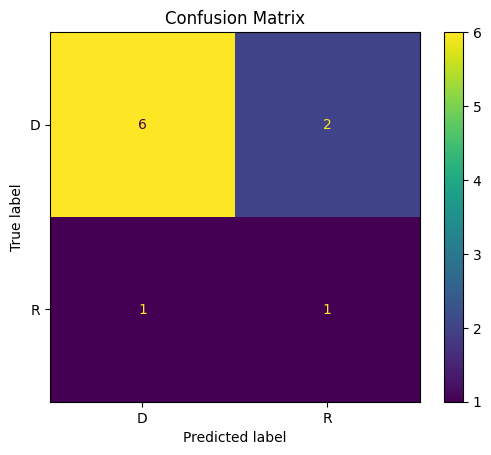

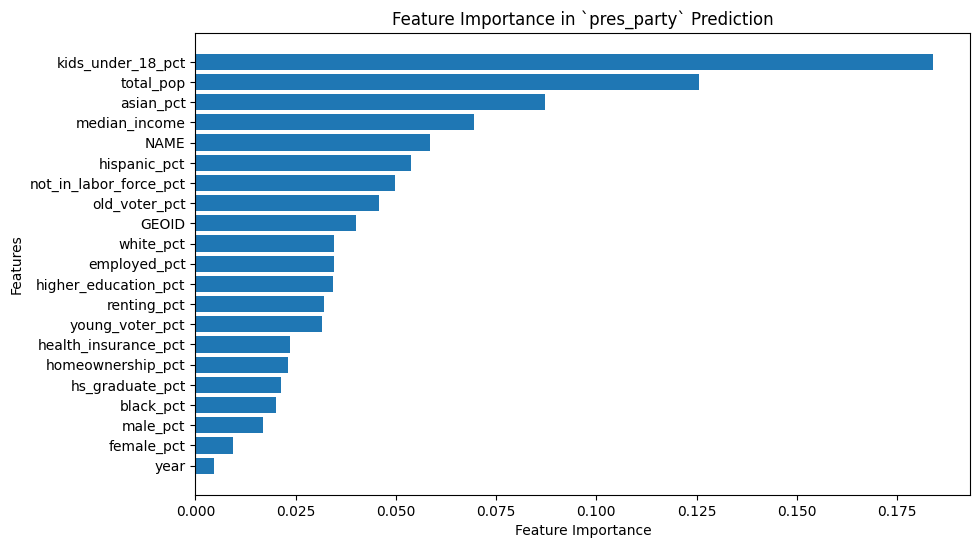

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Load data
file_path = "full-pres-data-2012-2020.csv"
data = pd.read_csv(file_path)

# Encode categorical columns
label_encoders = {}
for col in ['pres_party', 'NAME']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
features = data.drop(columns=['congressional_party', 'congressional_voter_turnout', 'pres_party', 'pres_voter_turnout'])
target = data['pres_party']

# Ensure all features are numeric
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Split data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train the classifier
model_pres_party = RandomForestClassifier(random_state=42)
model_pres_party.fit(train_features, train_target)

# Test the classifier
predictions = model_pres_party.predict(test_features)
accuracy = accuracy_score(test_target, predictions)
print(f"Accuracy for `pres_party` prediction: {accuracy:.2f}")

# Classification Report
class_report = classification_report(test_target, predictions, target_names=label_encoders['pres_party'].classes_)
print("\nClassification Report:\n", class_report)

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model_pres_party, test_features, test_target, 
                                       display_labels=label_encoders['pres_party'].classes_, cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
feature_importances = model_pres_party.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = features.columns[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, feature_importances[sorted_idx], align='center')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in `pres_party` Prediction")
plt.gca().invert_yaxis()
plt.show()


In [6]:
# Predict for Congressional District 22 (118th Congress), Texas
data_full = pd.read_csv("merged_data_full(2012-2022).csv")
district_22 = data_full[data_full["NAME"] == "Congressional District 22 (118th Congress), Texas"]

if district_22.empty:
    raise ValueError("District 22 data not found in the dataset.")

# Add district to encoder if necessary
if "Congressional District 22 (118th Congress), Texas" not in label_encoders['NAME'].classes_:
    label_encoders['NAME'].classes_ = np.append(label_encoders['NAME'].classes_, "Congressional District 22 (118th Congress), Texas")

district_22.loc[:, 'NAME'] = label_encoders['NAME'].transform(district_22['NAME'])

# Drop target columns
district_22_features = district_22.drop(columns=['congressional_party', 'congressional_voter_turnout'])
district_22_features = district_22_features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Make prediction
pres_party_prediction = model_pres_party.predict(district_22_features)[0]

# Decode prediction
pres_party_decoded = label_encoders['pres_party'].inverse_transform([int(pres_party_prediction)])[0]

# Display results
print(f"Predicted `pres_party`: {pres_party_decoded}")

Predicted `pres_party`: R


## RandomForestRegressor - Presidential voter turnout

Mean Absolute Error (MAE): 0.11
R² Score: -0.37


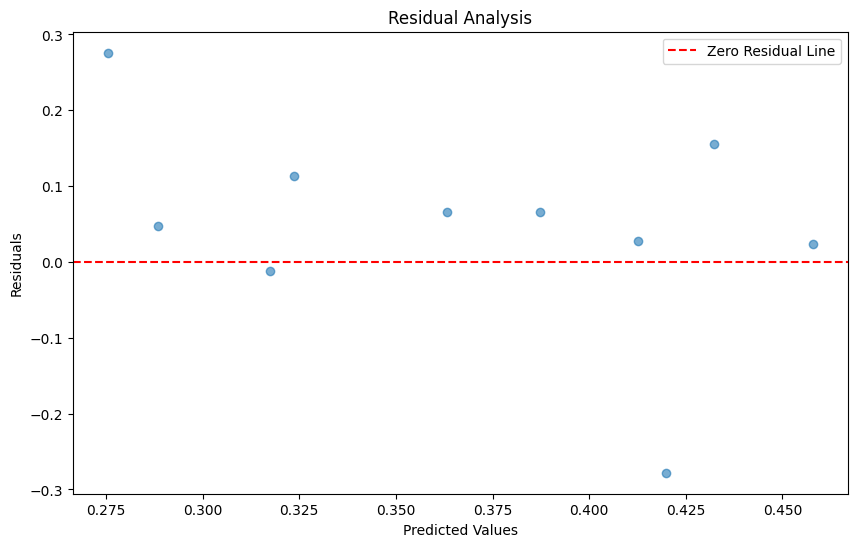

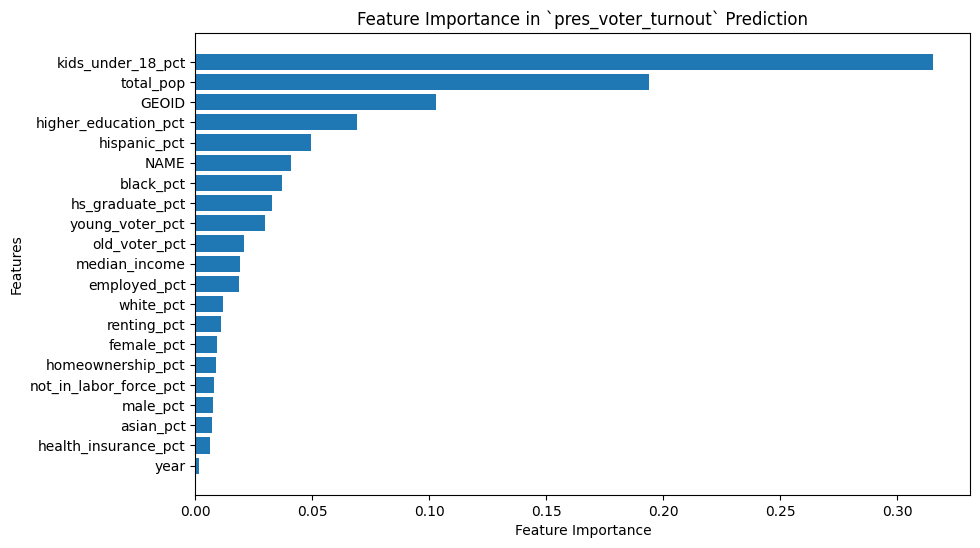

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load data
file_path = "full-pres-data-2012-2020.csv"
data = pd.read_csv(file_path)

# Encode the `NAME` column
label_encoder_name = LabelEncoder()
data['NAME'] = label_encoder_name.fit_transform(data['NAME'])

# Define features and target
features = data.drop(columns=['congressional_party', 'congressional_voter_turnout', 'pres_party', 'pres_voter_turnout'])
target = data['pres_voter_turnout']

# Ensure all features are numeric
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Split data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train the regressor
model_pres_voter_turnout = RandomForestRegressor(random_state=42)
model_pres_voter_turnout.fit(train_features, train_target)

# Test the regressor
predictions = model_pres_voter_turnout.predict(test_features)
mae = mean_absolute_error(test_target, predictions)
r2 = r2_score(test_target, predictions)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Residual Analysis
residuals = test_target - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.legend()
plt.show()

# Feature Importance
feature_importances = model_pres_voter_turnout.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = features.columns[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, feature_importances[sorted_idx], align='center')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in `pres_voter_turnout` Prediction")
plt.gca().invert_yaxis()
plt.show()


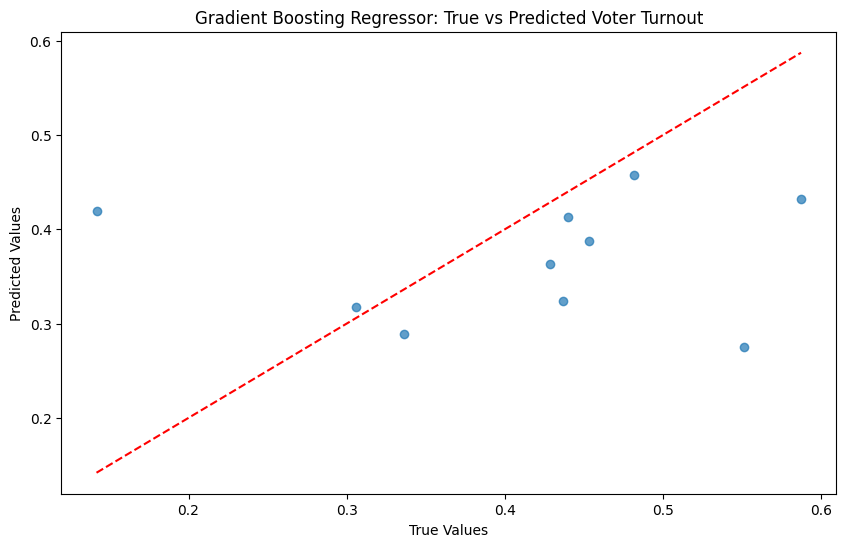

In [19]:
# Plot true vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(test_target, predictions, alpha=0.7)
plt.plot([min(test_target), max(test_target)], [min(test_target), max(test_target)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Regressor: True vs Predicted Voter Turnout")
plt.show()

In [8]:
# Predict for Congressional District 22 (118th Congress), Texas
data_full = pd.read_csv("merged_data_full(2012-2022).csv")
district_22 = data_full[data_full["NAME"] == "Congressional District 22 (118th Congress), Texas"]

if district_22.empty:
    raise ValueError("District 22 data not found in the dataset.")

# Add district to encoder if necessary
if "Congressional District 22 (118th Congress), Texas" not in label_encoder_name.classes_:
    label_encoder_name.classes_ = np.append(label_encoder_name.classes_, "Congressional District 22 (118th Congress), Texas")

district_22.loc[:, 'NAME'] = label_encoder_name.transform(district_22['NAME'])

# Drop target columns
district_22_features = district_22.drop(columns=['congressional_party', 'congressional_voter_turnout'])
district_22_features = district_22_features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Make prediction
pres_voter_turnout_prediction = model_pres_voter_turnout.predict(district_22_features)[0]

# Display results
print(f"Predicted `pres_voter_turnout`: {pres_voter_turnout_prediction:.2f}")

Predicted `pres_voter_turnout`: 0.24


## NAIVE BAYES CLASSIFIER - Presidential Election

Accuracy for `pres_party` prediction using Naive Bayes: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.50      0.50      0.50         2

    accuracy                           0.80        10
   macro avg       0.69      0.69      0.69        10
weighted avg       0.80      0.80      0.80        10



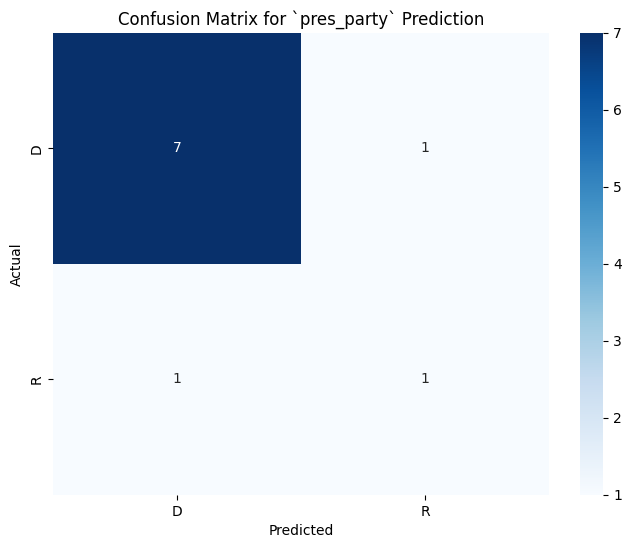

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
file_path = "full-pres-data-2012-2020.csv"
data = pd.read_csv(file_path)

# Encode categorical columns (e.g., 'pres_party', 'NAME')
label_encoders = {}
for col in ['pres_party', 'NAME']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
features = data.drop(columns=['congressional_party', 'congressional_voter_turnout', 'pres_party', 'pres_voter_turnout'])
target = data['pres_party']

# Ensure all features are numeric
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Split data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train the Naive Bayes classifier
model_nb = GaussianNB()
model_nb.fit(train_features, train_target)

# Test the classifier
predictions = model_nb.predict(test_features)
accuracy = accuracy_score(test_target, predictions)

# Print metrics
print(f"Accuracy for `pres_party` prediction using Naive Bayes: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(test_target, predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(test_target, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['pres_party'].classes_,
            yticklabels=label_encoders['pres_party'].classes_)
plt.title("Confusion Matrix for `pres_party` Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [10]:
# Predict for Congressional District 22 (118th Congress), Texas
data_full = pd.read_csv("merged_data_full(2012-2022).csv")
district_22 = data_full[data_full["NAME"] == "Congressional District 22 (118th Congress), Texas"]

if district_22.empty:
    raise ValueError("District 22 data not found in the dataset.")

# Add district to encoder if necessary
if "Congressional District 22 (118th Congress), Texas" not in label_encoders['NAME'].classes_:
    label_encoders['NAME'].classes_ = np.append(label_encoders['NAME'].classes_, "Congressional District 22 (118th Congress), Texas")

district_22 = district_22.copy()
district_22['NAME'] = label_encoders['NAME'].transform(district_22['NAME'])

# Drop target columns
district_22_features = district_22.drop(columns=['congressional_party', 'congressional_voter_turnout'])
district_22_features = district_22_features[train_features.columns]
district_22_features = district_22_features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Make prediction
pres_party_prediction = model_nb.predict(district_22_features)[0]

# Decode prediction
pres_party_decoded = label_encoders['pres_party'].inverse_transform([int(pres_party_prediction)])[0]

# Display results
print(f"Predicted `pres_party`: {pres_party_decoded}")

Predicted `pres_party`: D


## RandomForestClassifier - Congressional Election

Accuracy for `congressional_party` prediction: 0.93

Classification Report:
              precision    recall  f1-score   support

           D       0.94      0.91      0.92       245
           R       0.92      0.94      0.93       269

    accuracy                           0.93       514
   macro avg       0.93      0.93      0.93       514
weighted avg       0.93      0.93      0.93       514



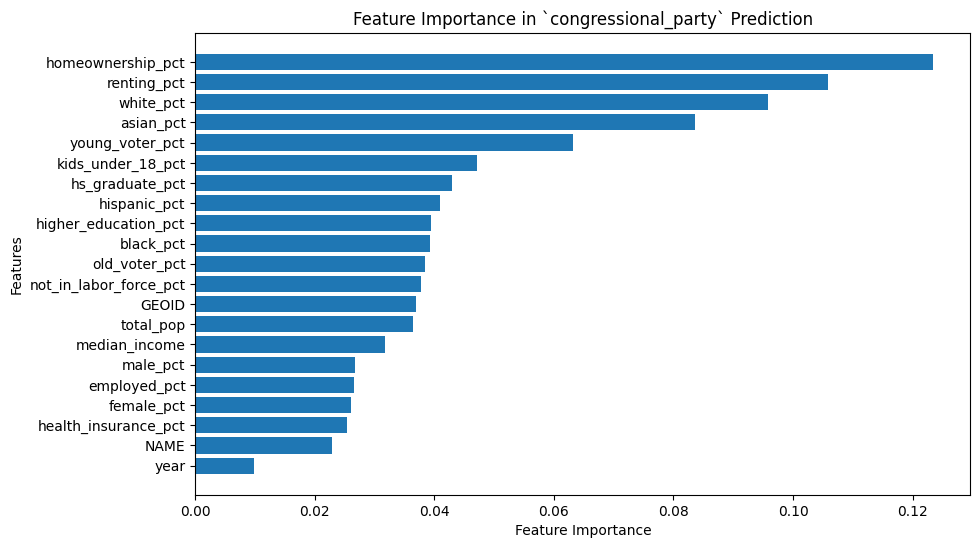

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load data
file_path = "merged_data_full(2012-2022).csv"
data = pd.read_csv(file_path)

# Encode the `congressional_party` column (target) and `NAME` column
label_encoders = {}
for col in ['congressional_party', 'NAME']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
features = data.drop(columns=['congressional_party', 'congressional_voter_turnout'])
target = data['congressional_party']

# Ensure all features are numeric
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Split data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train the Random Forest Classifier
model_congressional_party = RandomForestClassifier(random_state=42)
model_congressional_party.fit(train_features, train_target)

# Test the model
predictions = model_congressional_party.predict(test_features)
accuracy = accuracy_score(test_target, predictions)

# Get the unique classes in the test target
unique_classes = np.unique(test_target)

# Print metrics
print(f"Accuracy for `congressional_party` prediction: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(
    test_target, predictions,
    target_names=label_encoders['congressional_party'].inverse_transform(unique_classes)
))

# Feature Importance
feature_importances = model_congressional_party.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = features.columns[sorted_idx]

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, feature_importances[sorted_idx], align='center')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in `congressional_party` Prediction")
plt.gca().invert_yaxis()
plt.show()

Confusion Matrix:
     D    R
D  223   22
R   15  254


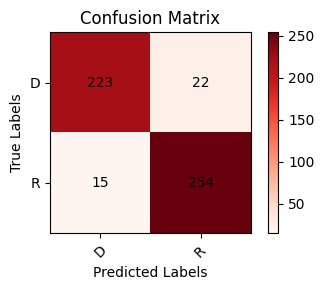

In [4]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_target, predictions)

# Convert confusion matrix to a DataFrame for better readability
class_names = label_encoders['congressional_party'].inverse_transform(np.unique(test_target))
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Display confusion matrix as a DataFrame table
print("Confusion Matrix:")
print(conf_matrix_df)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Reds')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45)
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

# Annotate cells with numbers
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv("merged_data_full(2012-2022).csv")

# Check and filter for District 22 in 2022
district_22 = data[(data["NAME"].str.strip() == "Congressional District 22 (118th Congress), Texas") & (data["year"] == 2022)]

if district_22.empty:
    raise ValueError("District 22 data for the year 2022 not found in the dataset.")

# Drop target columns to retain only features
district_22_features = district_22.drop(columns=['congressional_party', 'congressional_voter_turnout'])
district_22_features = district_22_features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Make a prediction
district_22_prediction = model_congressional_party.predict(district_22_features)

# Decode the predicted label back to its original value
predicted_congressional_party = label_encoders['congressional_party'].inverse_transform([district_22_prediction[0]])[0]

# Display the result
print(f"Predicted `congressional_party` for District 22 of Texas in 2024: {predicted_congressional_party}")

Predicted `congressional_party` for District 22 of Texas in 2024: R


## RANDOM FOREST REGRESSOR - CONGRESSIONAL DISTRICT

Mean Absolute Error (MAE): 0.04
R² Score: 0.79


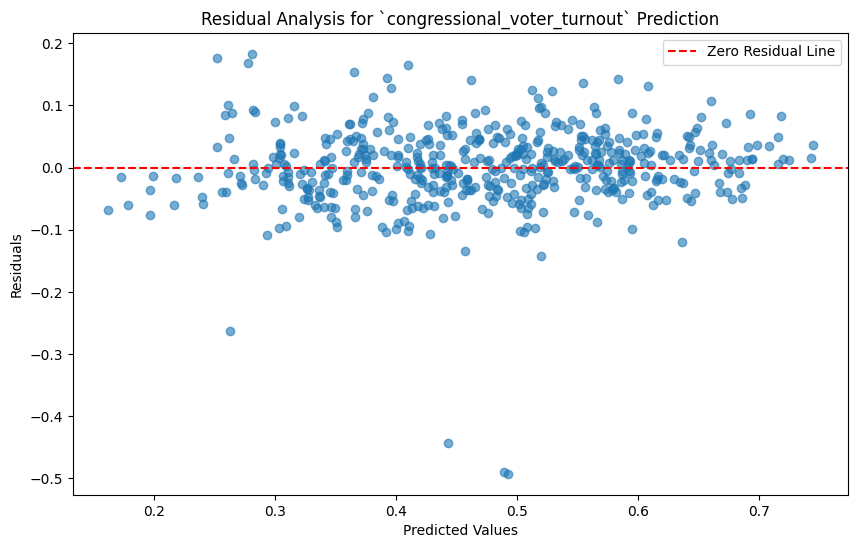

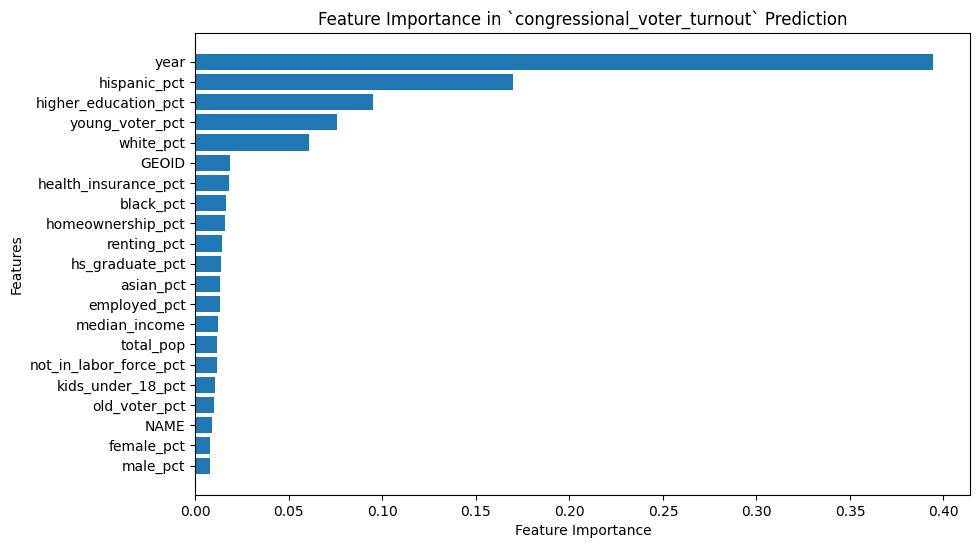

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load data
file_path = "merged_data_full(2012-2022).csv"
data = pd.read_csv(file_path)

# Encode the `NAME` column
label_encoder_name = LabelEncoder()
data['NAME'] = label_encoder_name.fit_transform(data['NAME'])

# Define features and target
features = data.drop(columns=['congressional_party', 'congressional_voter_turnout'])
target = data['congressional_voter_turnout']

# Ensure all features are numeric
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Split data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train the regressor
model_congressional_voter_turnout = RandomForestRegressor(random_state=42)
model_congressional_voter_turnout.fit(train_features, train_target)

# Test the regressor
predictions = model_congressional_voter_turnout.predict(test_features)
mae = mean_absolute_error(test_target, predictions)
r2 = r2_score(test_target, predictions)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Residual Analysis
residuals = test_target - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis for `congressional_voter_turnout` Prediction')
plt.legend()
plt.show()

# Feature Importance
feature_importances = model_congressional_voter_turnout.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = features.columns[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, feature_importances[sorted_idx], align='center')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in `congressional_voter_turnout` Prediction")
plt.gca().invert_yaxis()
plt.show()

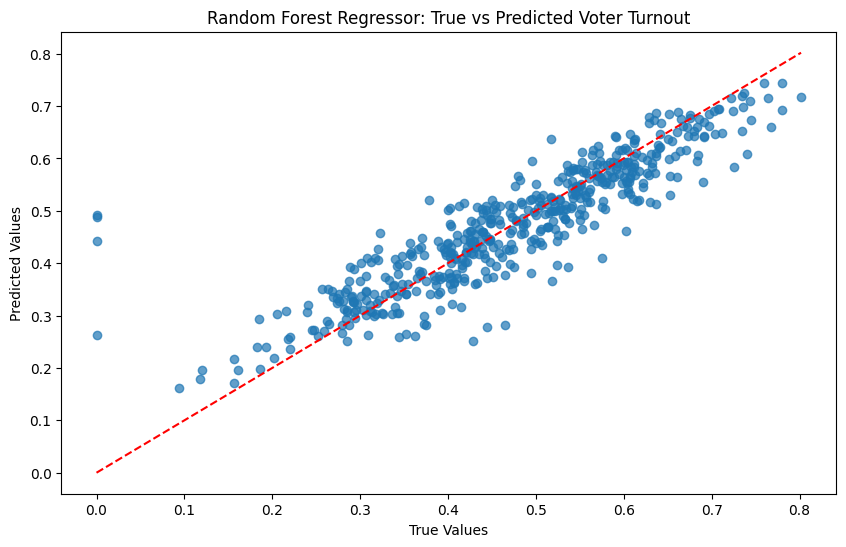

In [17]:
# Plot true vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(test_target, predictions, alpha=0.7)
plt.plot([min(test_target), max(test_target)], [min(test_target), max(test_target)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regressor: True vs Predicted Voter Turnout")
plt.show()

In [ ]:
# Predict for Congressional District 22 (118th Congress), Texas
district_22_encoded = label_encoder_name.transform(["Congressional District 22 (118th Congress), Texas"])[0]

# Filter the data for the encoded `NAME` and the year 2022
district_22 = data[(data["NAME"] == district_22_encoded) & (data["year"] == 2022)]

if district_22.empty:
    raise ValueError("District 22 data for the year 2022 not found in the dataset.")

# Drop target columns
district_22_features = district_22.drop(columns=['congressional_party', 'congressional_voter_turnout'])
district_22_features = district_22_features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Make prediction
district_22_voter_turnout_prediction = model_congressional_voter_turnout.predict(district_22_features)[0]

# Display the result
print(f"Predicted `congressional_voter_turnout` for District 22 in 2024: {district_22_voter_turnout_prediction:.2f}")

Predicted `congressional_voter_turnout` for District 22 in 2024: 0.41


## NAIVE BAYES - Congressional elections

Accuracy for `congressional_party` prediction using Naive Bayes: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.57      0.68       245
           2       0.70      0.91      0.79       269

    accuracy                           0.75       514
   macro avg       0.78      0.74      0.74       514
weighted avg       0.77      0.75      0.74       514



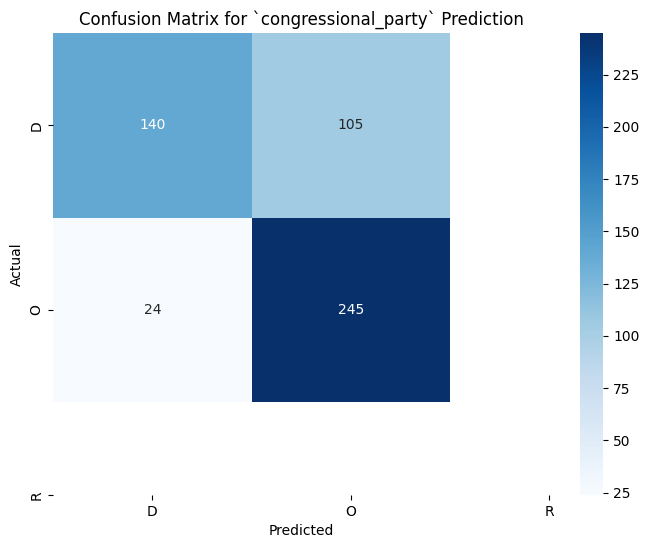

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
file_path = "merged_data_full(2012-2022).csv"
data = pd.read_csv(file_path)

# Encode categorical columns (e.g., 'congressional_party', 'NAME')
label_encoders = {}
for col in ['congressional_party', 'NAME']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
features = data.drop(columns=['congressional_party', 'congressional_voter_turnout'])
target = data['congressional_party']

# Ensure all features are numeric
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Split data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train the Naive Bayes classifier
model_nb = GaussianNB()
model_nb.fit(train_features, train_target)

# Test the classifier
predictions = model_nb.predict(test_features)
accuracy = accuracy_score(test_target, predictions)

# Print metrics
print(f"Accuracy for `congressional_party` prediction using Naive Bayes: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(test_target, predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(test_target, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['congressional_party'].classes_,
            yticklabels=label_encoders['congressional_party'].classes_)
plt.title("Confusion Matrix for `congressional_party` Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
import pandas as pd
import numpy as np

# Load the full dataset
data_full = pd.read_csv("merged_data_full(2012-2022).csv")

# Extract the row for "Congressional District 22 (118th Congress), Texas" for 2022
district_22 = data_full[
    (data_full["NAME"] == "Congressional District 22 (118th Congress), Texas") & 
    (data_full["year"] == 2022)
]

if district_22.empty:
    raise ValueError("District 22 data for the year 2022 not found in the dataset.")

# Encode the `NAME` column using the same LabelEncoder used during training
if "Congressional District 22 (118th Congress), Texas" not in label_encoders['NAME'].classes_:
    label_encoders['NAME'].classes_ = np.append(label_encoders['NAME'].classes_, "Congressional District 22 (118th Congress), Texas")

district_22.loc[:, 'NAME'] = label_encoders['NAME'].transform(district_22['NAME'])

# Drop the target columns to retain only features
district_22_features = district_22.drop(columns=['congressional_party', 'congressional_voter_turnout'])
district_22_features = district_22_features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Predict the congressional party for District 22
district_22_prediction = model_nb.predict(district_22_features)[0]

# Decode the prediction
predicted_party = label_encoders['congressional_party'].inverse_transform([district_22_prediction])[0]

# Display the result
print(f"Predicted `congressional_party` for District 22 in 2024: {predicted_party}")

Predicted `congressional_party` for District 22 in 2024: R


## LOGISTIC REGRESSION - Presidential Elections

Accuracy for `pres_party` prediction using Logistic Regression: 1.00

Classification Report:
               precision    recall  f1-score   support

           D       1.00      1.00      1.00         8
           R       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


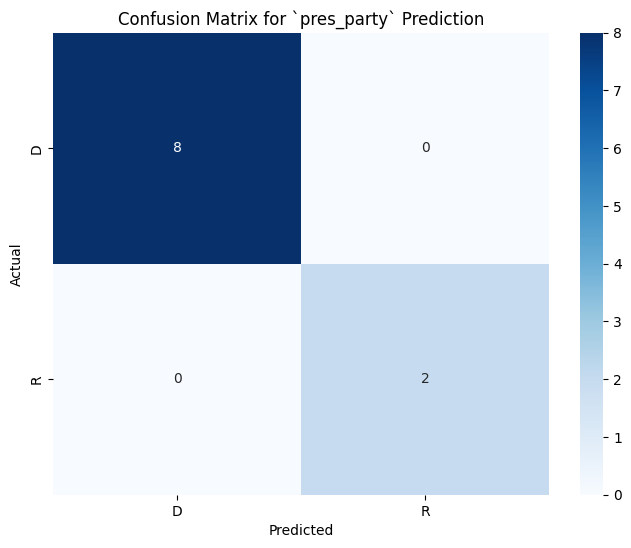

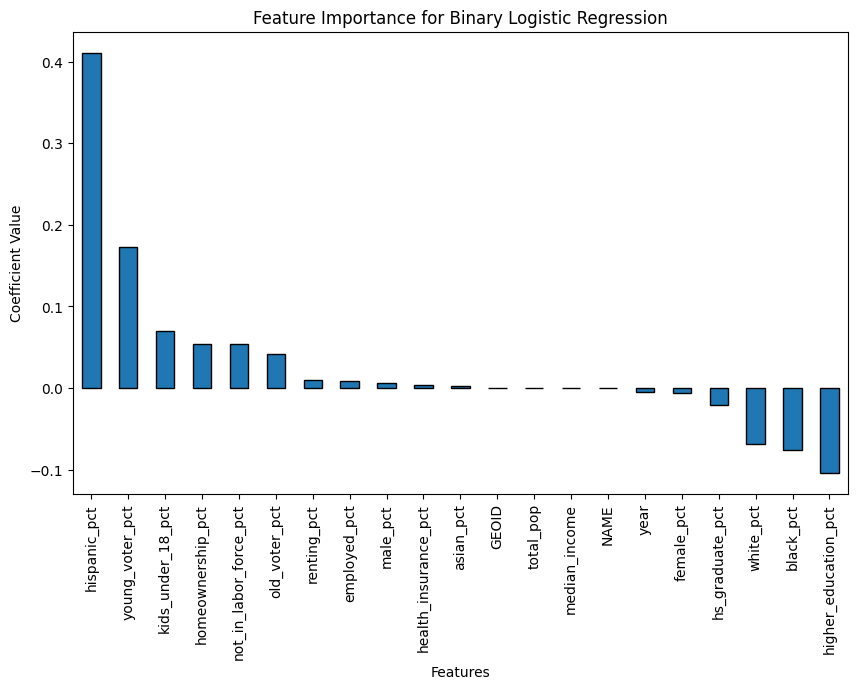

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
file_path = "full-pres-data-2012-2020.csv"
data = pd.read_csv(file_path)

# Encode categorical columns (e.g., 'pres_party', 'NAME')
label_encoders = {}
for col in ['pres_party', 'NAME']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
features = data.drop(columns=['congressional_party', 'congressional_voter_turnout', 'pres_party', 'pres_voter_turnout'])
target = data['pres_party']

# Ensure all features are numeric
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Split data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train the Logistic Regression model with multi-class setting
model_logreg = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial', solver='lbfgs')
model_logreg.fit(train_features, train_target)

# Test the model
predictions = model_logreg.predict(test_features)
accuracy = accuracy_score(test_target, predictions)

# Print metrics
print(f"Accuracy for `pres_party` prediction using Logistic Regression: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(
    test_target, predictions, target_names=label_encoders['pres_party'].classes_
))

# Confusion Matrix
conf_matrix = confusion_matrix(test_target, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['pres_party'].classes_,
            yticklabels=label_encoders['pres_party'].classes_)
plt.title("Confusion Matrix for `pres_party` Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance Plot (Binary or Multi-class Handling)
coefficients = model_logreg.coef_
classes = label_encoders['pres_party'].classes_

if coefficients.shape[0] == 1:
    # Binary classification
    feature_importance = pd.Series(coefficients[0], index=features.columns).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='bar', edgecolor='k')
    plt.title("Feature Importance for Binary Logistic Regression")
    plt.xlabel("Features")
    plt.ylabel("Coefficient Value")
    plt.show()
else:
    # Multi-class classification
    for idx, class_label in enumerate(classes):
        feature_importance = pd.Series(coefficients[idx], index=features.columns).sort_values(ascending=False)
        plt.figure(figsize=(10, 6))
        feature_importance.plot(kind='bar', edgecolor='k')
        plt.title(f'Feature Importance for Class `{class_label}` (Logistic Regression)')
        plt.xlabel("Features")
        plt.ylabel("Coefficient Value")
        plt.show()

In [18]:
print(label_encoders['pres_party'].classes_)

['D' 'R']


In [19]:
# Predict for Congressional District 22 (118th Congress), Texas
data_full = pd.read_csv("merged_data_full(2012-2022).csv")

# Filter the district for the year 2022
district_22 = data_full[(data_full["NAME"] == "Congressional District 22 (118th Congress), Texas") & (data_full["year"] == 2022)]

if district_22.empty:
    raise ValueError("District 22 data for the year 2022 not found in the dataset.")

# Add district to encoder if necessary
if "Congressional District 22 (118th Congress), Texas" not in label_encoders['NAME'].classes_:
    label_encoders['NAME'].classes_ = np.append(label_encoders['NAME'].classes_, "Congressional District 22 (118th Congress), Texas")

# Encode the `NAME` column for the district
district_22.loc[:, 'NAME'] = label_encoders['NAME'].transform(district_22['NAME'])

# Drop target columns
district_22_features = district_22.drop(columns=['congressional_party', 'congressional_voter_turnout'])
district_22_features = district_22_features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Make prediction
pres_party_prediction = model_logreg.predict(district_22_features)[0]

# Decode prediction
pres_party_decoded = label_encoders['pres_party'].inverse_transform([int(pres_party_prediction)])[0]

# Display the result
print(f"Predicted `pres_party` for Congressional District 22 in 2024: {pres_party_decoded}")


Predicted `pres_party` for Congressional District 22 in 2024: D


## LINEAR REGRESSION - Presidential Elections

Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.10
R² Score: 0.38
Explained Variance Score: 0.39


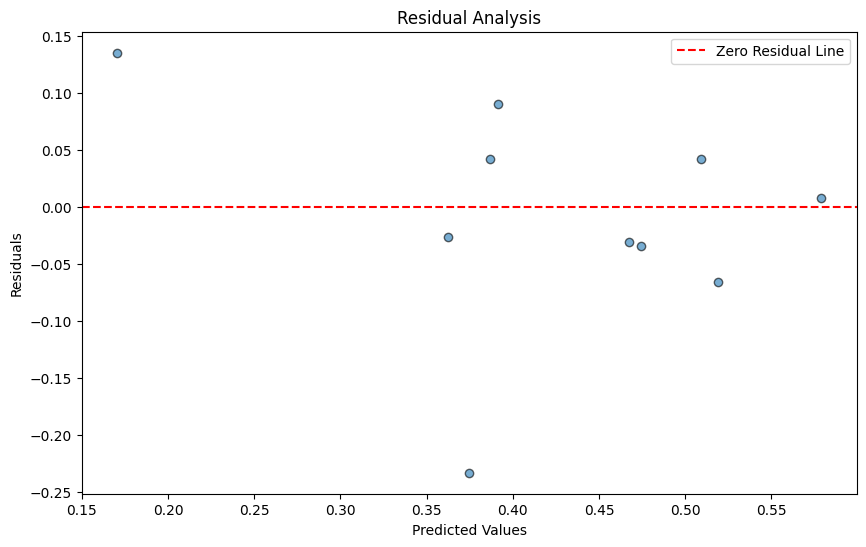

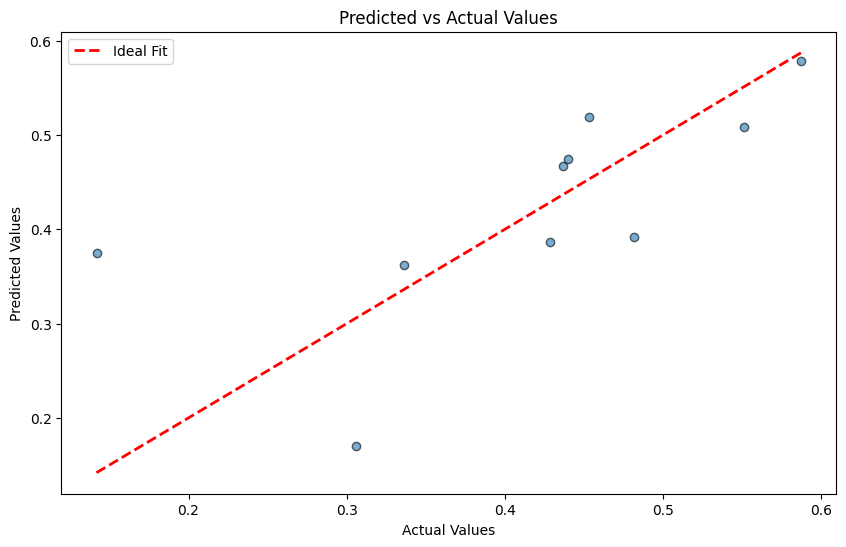

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    r2_score,
    mean_squared_error,
    explained_variance_score
)

# Load data
file_path = "full-pres-data-2012-2020.csv"
data = pd.read_csv(file_path)

# Encode the `NAME` column
label_encoder_name = LabelEncoder()
data['NAME'] = label_encoder_name.fit_transform(data['NAME'])

# Define features and target
features = data.drop(columns=['congressional_party', 'congressional_voter_turnout', 'pres_party', 'pres_voter_turnout'])
target = data['pres_voter_turnout']

# Ensure all features are numeric
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Split data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train the Linear Regression model
model_linear_reg = LinearRegression()
model_linear_reg.fit(train_features, train_target)

# Test the model
predictions = model_linear_reg.predict(test_features)

# Metrics
mae = mean_absolute_error(test_target, predictions)
mse = mean_squared_error(test_target, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_target, predictions)
explained_variance = explained_variance_score(test_target, predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Explained Variance Score: {explained_variance:.2f}")

# Residual Analysis
residuals = test_target - predictions

plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.6, edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.legend()
plt.show()

# Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(test_target, predictions, alpha=0.6, edgecolor='k')
plt.plot([test_target.min(), test_target.max()], [test_target.min(), test_target.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

In [21]:
# Predict for Congressional District 22 (118th Congress), Texas
data_full = pd.read_csv("merged_data_full(2012-2022).csv")

# Filter the district for the year 2022
district_22 = data_full[(data_full["NAME"] == "Congressional District 22 (118th Congress), Texas") & (data_full["year"] == 2022)]

if district_22.empty:
    raise ValueError("District 22 data for the year 2022 not found in the dataset.")

# Add district to encoder if necessary
if "Congressional District 22 (118th Congress), Texas" not in label_encoder_name.classes_:
    label_encoder_name.classes_ = np.append(label_encoder_name.classes_, "Congressional District 22 (118th Congress), Texas")

# Encode the `NAME` column for the district
district_22.loc[:, 'NAME'] = label_encoder_name.transform(district_22['NAME'])

# Drop target columns
district_22_features = district_22.drop(columns=['congressional_party', 'congressional_voter_turnout'])
district_22_features = district_22_features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Make prediction
district_22_turnout_prediction = model_linear_reg.predict(district_22_features)[0]

# Display the result
print(f"Predicted `pres_voter_turnout` for District 22 in 2024: {district_22_turnout_prediction:.2f}")


Predicted `pres_voter_turnout` for District 22 in 2024: 0.29


## LOGISTIC REGRESSION - Congressional Elections

Accuracy for `congressional_party` prediction using Logistic Regression: 0.78

Classification Report:
               precision    recall  f1-score   support

           D       0.80      0.71      0.75       245
           R       0.76      0.84      0.80       269

    accuracy                           0.78       514
   macro avg       0.78      0.78      0.78       514
weighted avg       0.78      0.78      0.78       514



c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


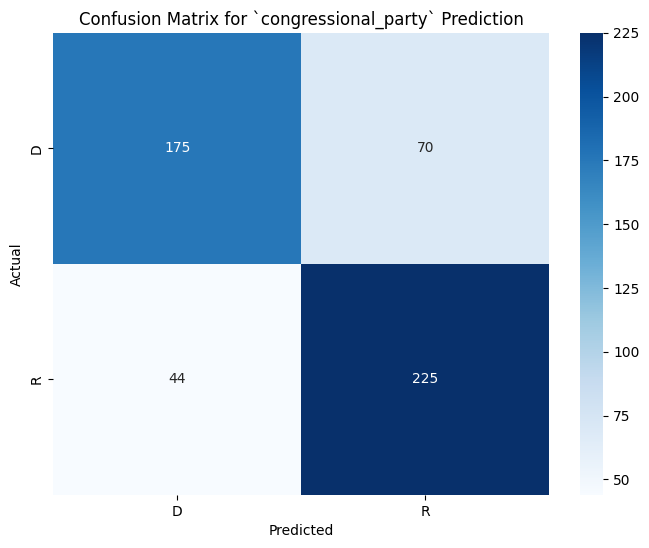

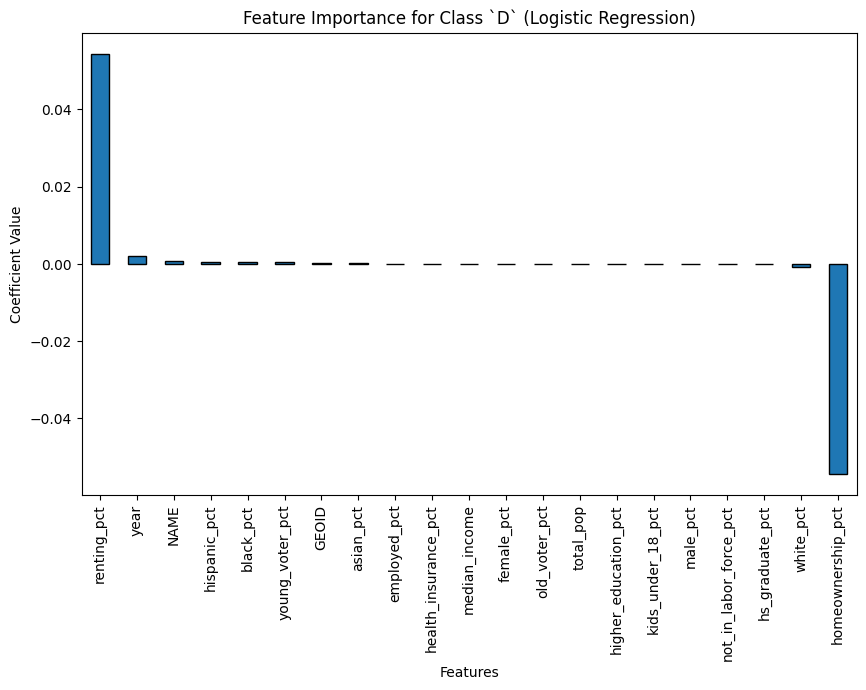

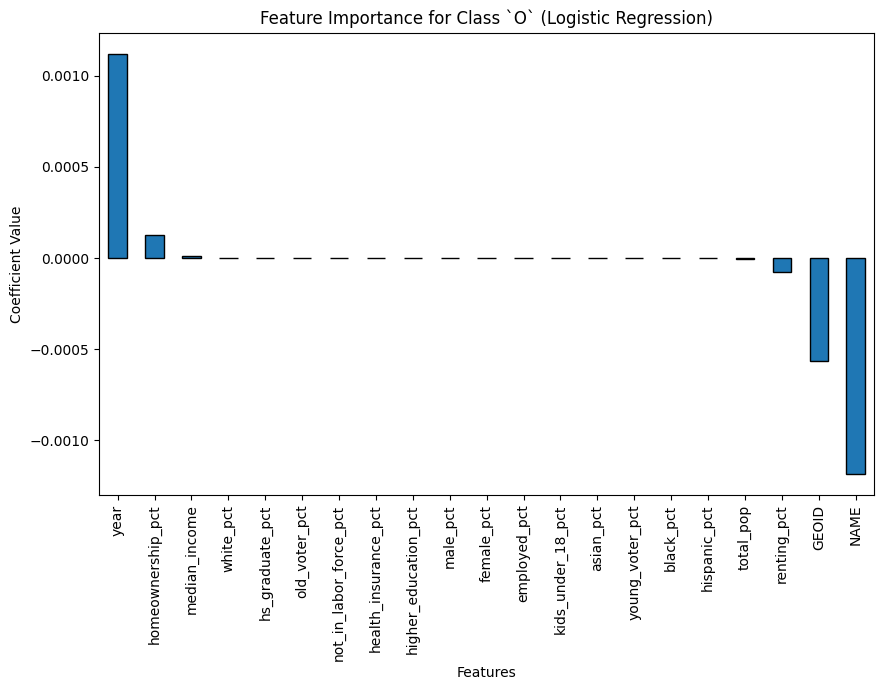

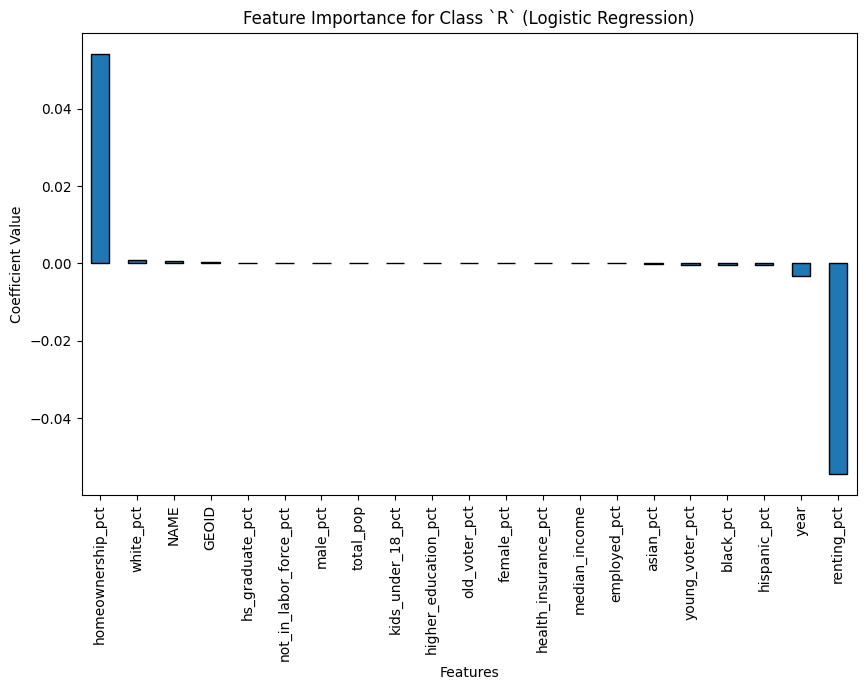

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
file_path = "merged_data_full(2012-2022).csv"
data = pd.read_csv(file_path)

# Encode the `congressional_party` column (target) and `NAME` column
label_encoders = {}
for col in ['congressional_party', 'NAME']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
features = data.drop(columns=['congressional_party', 'congressional_voter_turnout'])
target = data['congressional_party']

# Ensure all features are numeric
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Split data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train the Logistic Regression model
model_log_reg = LogisticRegression(max_iter=500, random_state=42)
model_log_reg.fit(train_features, train_target)

# Test the model
predictions = model_log_reg.predict(test_features)
accuracy = accuracy_score(test_target, predictions)

# Get unique classes in the test target
unique_classes = np.unique(test_target)

# Metrics and classification report
print(f"Accuracy for `congressional_party` prediction using Logistic Regression: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(
    test_target, predictions,
    target_names=label_encoders['congressional_party'].inverse_transform(unique_classes)
))

# Confusion Matrix
conf_matrix = confusion_matrix(test_target, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=label_encoders['congressional_party'].inverse_transform(unique_classes),
    yticklabels=label_encoders['congressional_party'].inverse_transform(unique_classes),
)
plt.title("Confusion Matrix for `congressional_party` Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance for All Classes
coefficients = model_log_reg.coef_  # Coefficients for all classes
classes = label_encoders['congressional_party'].classes_

# Plot Feature Importance for Each Class
for idx, class_label in enumerate(classes):
    feature_importance = pd.Series(coefficients[idx], index=train_features.columns).sort_values(ascending=False)

    # Plot for the current class
    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='bar', edgecolor='k')
    plt.title(f'Feature Importance for Class `{class_label}` (Logistic Regression)')
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.show()

In [23]:
# Extract the data for Congressional District 22 (118th Congress), Texas, for the year 2022
district_22 = data[(data['NAME'] == label_encoders['NAME'].transform(['Congressional District 22 (118th Congress), Texas'])[0]) & (data['year'] == 2022)]

if district_22.empty:
    raise ValueError("District 22 data for the year 2022 not found in the dataset.")

# Drop the target column to retain only features
district_22_features = district_22.drop(columns=['congressional_party', 'congressional_voter_turnout'])

# Ensure all features are numeric
district_22_features = district_22_features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Predict the congressional_party for District 22
district_22_prediction = model_log_reg.predict(district_22_features)[0]

# Decode the prediction back to the original class
predicted_congressional_party = label_encoders['congressional_party'].inverse_transform([district_22_prediction])[0]

# Display the result
print(f"Predicted `congressional_party` for District 22 in 2024: {predicted_congressional_party}")

Predicted `congressional_party` for District 22 in 2024: R


## LINEAR REGRESSION - Congressional Elections

Mean Absolute Error (MAE): 0.09
R² Score: 0.38


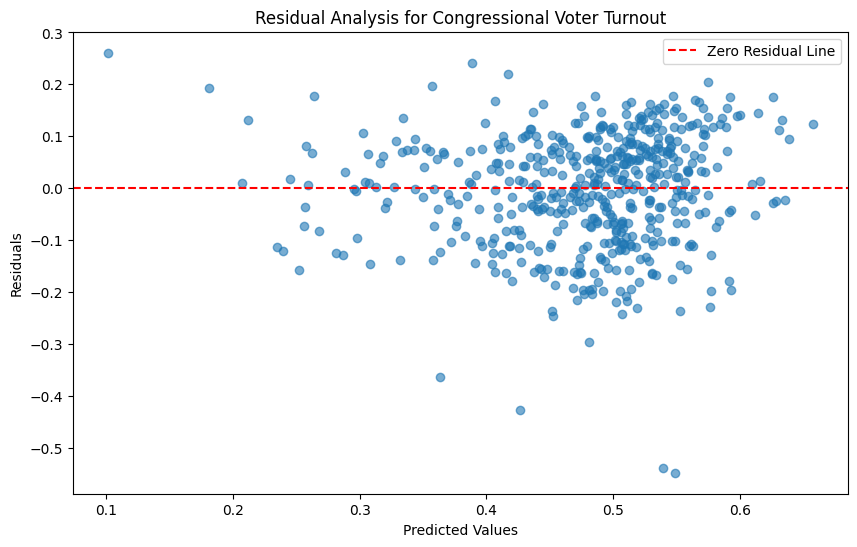

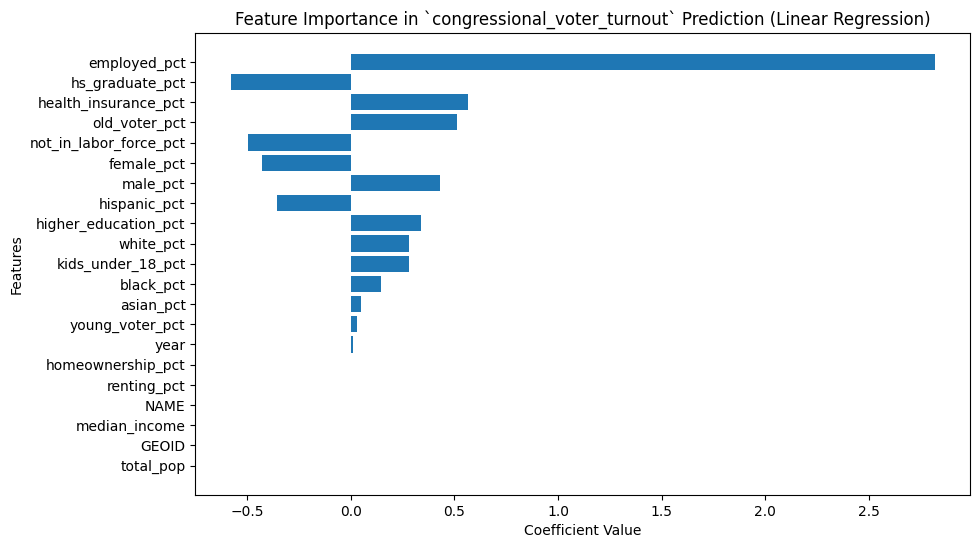

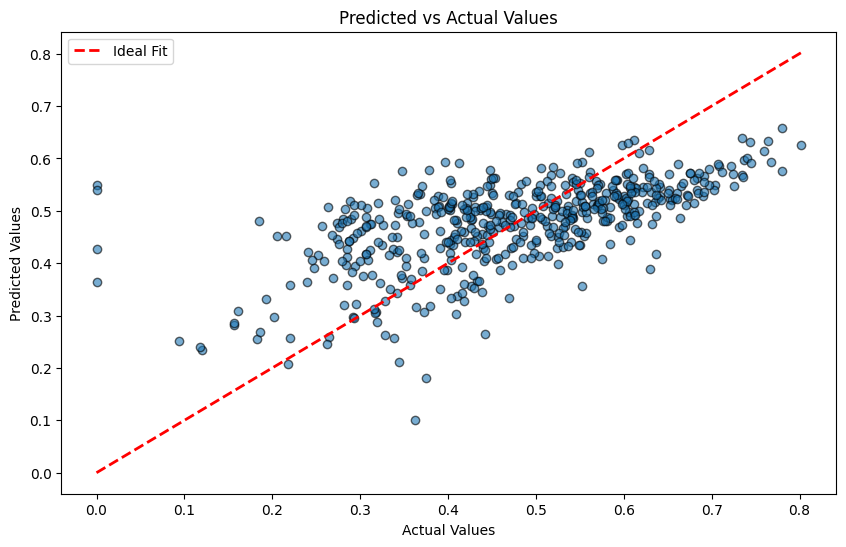

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load data
file_path = "merged_data_full(2012-2022).csv"
data = pd.read_csv(file_path)

# Encode the `NAME` column
label_encoder_name = LabelEncoder()
data['NAME'] = label_encoder_name.fit_transform(data['NAME'])

# Define features and target
features = data.drop(columns=['congressional_party', 'congressional_voter_turnout'])
target = data['congressional_voter_turnout']

# Ensure all features are numeric
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Split data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train the Linear Regression model
model_linear_reg = LinearRegression()
model_linear_reg.fit(train_features, train_target)

# Test the model
predictions = model_linear_reg.predict(test_features)
mae = mean_absolute_error(test_target, predictions)
r2 = r2_score(test_target, predictions)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Residual Analysis
residuals = test_target - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis for Congressional Voter Turnout')
plt.legend()
plt.show()

# Feature Importance (using coefficients)
coefficients = model_linear_reg.coef_
sorted_idx = np.argsort(np.abs(coefficients))[::-1]
sorted_features = features.columns[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, coefficients[sorted_idx], align='center')
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance in `congressional_voter_turnout` Prediction (Linear Regression)")
plt.gca().invert_yaxis()
plt.show()

# Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(test_target, predictions, alpha=0.6, edgecolor='k')
plt.plot([test_target.min(), test_target.max()], [test_target.min(), test_target.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()


In [25]:
# Extract District 22 data for the year 2022
district_22 = data[(data['NAME'] == label_encoder_name.transform(['Congressional District 22 (118th Congress), Texas'])[0]) & 
                   (data['year'] == 2022)]

if district_22.empty:
    raise ValueError("District 22 data for the year 2022 not found in the dataset.")

# Drop the target column
district_22_features = district_22.drop(columns=['congressional_party', 'congressional_voter_turnout'])
district_22_features = district_22_features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Make the prediction
district_22_voter_turnout_prediction = model_linear_reg.predict(district_22_features)[0]

# Display the result
print(f"Predicted `congressional_voter_turnout` for District 22 in 2024: {district_22_voter_turnout_prediction:.2f}")

Predicted `congressional_voter_turnout` for District 22 in 2024: 0.48


## SVM --> Suport Vector Classifier - Presidential Elections

Accuracy for `pres_party` prediction using SVM: 1.00

Classification Report:
               precision    recall  f1-score   support

           D       1.00      1.00      1.00         8
           R       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



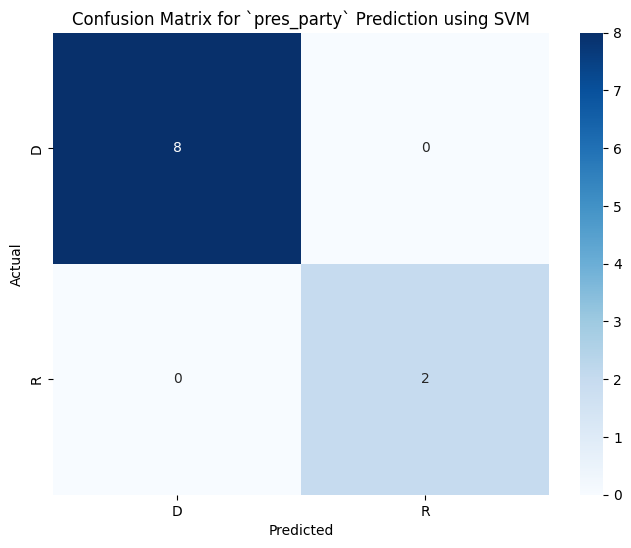

<Figure size 1000x600 with 0 Axes>

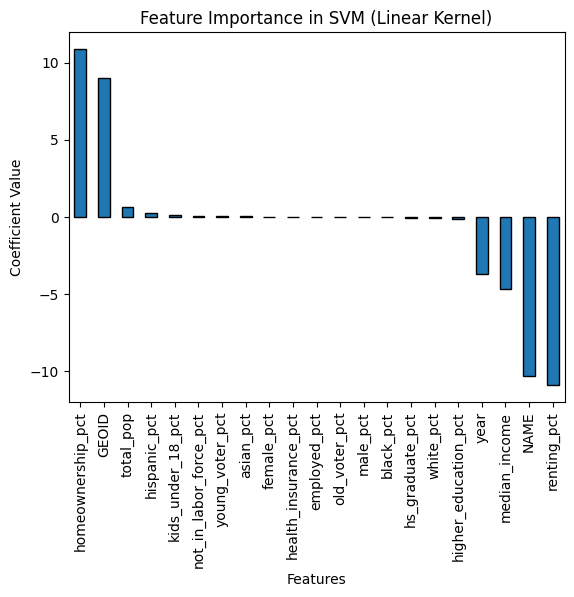

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
file_path = "full-pres-data-2012-2020.csv"
data = pd.read_csv(file_path)

# Encode categorical columns (e.g., 'pres_party', 'NAME')
label_encoders = {}
for col in ['pres_party', 'NAME']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
features = data.drop(columns=['congressional_party', 'congressional_voter_turnout', 'pres_party', 'pres_voter_turnout'])
target = data['pres_party']

# Ensure all features are numeric
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Split data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train the Support Vector Machine classifier
model_svm = SVC(kernel='linear', probability=True, random_state=42)
model_svm.fit(train_features, train_target)

# Test the model
predictions = model_svm.predict(test_features)
accuracy = accuracy_score(test_target, predictions)

# Metrics and classification report
print(f"Accuracy for `pres_party` prediction using SVM: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(
    test_target, predictions,
    target_names=label_encoders['pres_party'].classes_
))

# Confusion Matrix
conf_matrix = confusion_matrix(test_target, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['pres_party'].classes_,
            yticklabels=label_encoders['pres_party'].classes_)
plt.title("Confusion Matrix for `pres_party` Prediction using SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

coefficients = pd.DataFrame(
    model_svm.coef_.T,
    columns=['Coefficient'],
    index=features.columns
).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar', legend=False, edgecolor='k')
plt.title("Feature Importance in SVM (Linear Kernel)")
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.show()


In [27]:
# Predict for Congressional District 22 (118th Congress), Texas
data_full = pd.read_csv("merged_data_full(2012-2022).csv")

# Extract the row for "Congressional District 22 (118th Congress), Texas"
district_22 = data_full[(data_full["NAME"] == "Congressional District 22 (118th Congress), Texas") & (data_full["year"] == 2022)]

if district_22.empty:
    raise ValueError("District 22 data for the year 2022 not found in the dataset.")

# Encode the `NAME` column using the same LabelEncoder used during training
if "Congressional District 22 (118th Congress), Texas" not in label_encoders['NAME'].classes_:
    label_encoders['NAME'].classes_ = np.append(label_encoders['NAME'].classes_, "Congressional District 22 (118th Congress), Texas")

# Use .loc explicitly for modification to avoid the warning
district_22.loc[:, 'NAME'] = label_encoders['NAME'].transform(district_22['NAME'])

# Drop the target columns and retain features
district_22_features = district_22.drop(columns=['congressional_party', 'congressional_voter_turnout'])
district_22_features = district_22_features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Predict the presidential party for District 22
district_22_prediction = model_svm.predict(district_22_features)[0]

# Decode the prediction to the original class name
pres_party_predicted = label_encoders['pres_party'].inverse_transform([int(district_22_prediction)])[0]

# Display the prediction
print(f"Predicted `pres_party` for District 22 in 2024: {pres_party_predicted}")

Predicted `pres_party` for District 22 in 2024: D


## SVM --> Suport Vector Regressor - Presidential Elections

Mean Absolute Error (MAE): 0.10
R² Score: 0.08


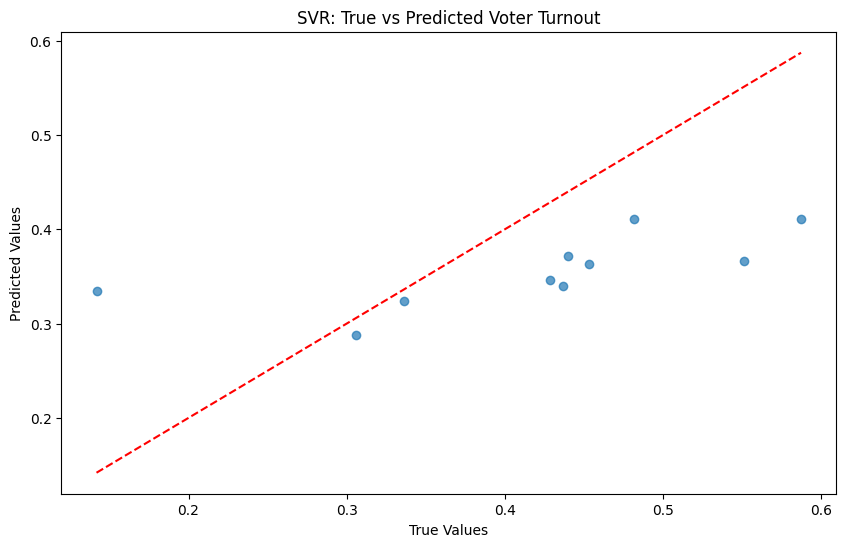

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
file_path = "full-pres-data-2012-2020.csv"
data = pd.read_csv(file_path)

# Encode the `NAME` column
label_encoder_name = LabelEncoder()
data['NAME'] = label_encoder_name.fit_transform(data['NAME'])

# Define features and target
features = data.drop(columns=['congressional_party', 'congressional_voter_turnout', 'pres_party', 'pres_voter_turnout'])
target = data['pres_voter_turnout']

# Ensure all features are numeric
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Standardize features for SVM
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train the Support Vector Regressor
model_svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model_svr.fit(train_features, train_target)

# Test the model
predictions = model_svr.predict(test_features)
mae = mean_absolute_error(test_target, predictions)
r2 = r2_score(test_target, predictions)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot true vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(test_target, predictions, alpha=0.7)
plt.plot([min(test_target), max(test_target)], [min(test_target), max(test_target)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("SVR: True vs Predicted Voter Turnout")
plt.show()

In [29]:
# Load the full dataset
data_full = pd.read_csv("merged_data_full(2012-2022).csv")

# Extract the row for "Congressional District 22 (118th Congress), Texas" for the year 2022
district_22 = data_full[(data_full["NAME"] == "Congressional District 22 (118th Congress), Texas") & (data_full["year"] == 2022)]

if district_22.empty:
    raise ValueError("District 22 data for the year 2022 not found in the dataset.")

# Update the LabelEncoder with the new district name if it doesn't exist
if "Congressional District 22 (118th Congress), Texas" not in label_encoder_name.classes_:
    label_encoder_name.classes_ = np.append(label_encoder_name.classes_, "Congressional District 22 (118th Congress), Texas")

# Encode the `NAME` column
district_22.loc[:, 'NAME'] = label_encoder_name.transform(district_22['NAME'])

# Drop target columns to retain only features
district_22_features = district_22.drop(columns=['congressional_party', 'congressional_voter_turnout'])

# Ensure all features are numeric and apply the same scaling used in training
district_22_features = scaler.transform(district_22_features.apply(pd.to_numeric, errors='coerce').fillna(0))

# Make prediction
district_22_turnout_prediction = model_svr.predict(district_22_features)[0]

# Display the result
print(f"Predicted `pres_voter_turnout` for District 22 in 2024: {district_22_turnout_prediction:.2f}")


Predicted `pres_voter_turnout` for District 22 in 2024: 0.31


## SVM --> Support Vector Classifier - Congressional Elections

Accuracy for `congressional_party` prediction using SVC: 0.70

Classification Report:
               precision    recall  f1-score   support

           D       0.72      0.62      0.67       245
           R       0.69      0.78      0.73       269

    accuracy                           0.70       514
   macro avg       0.70      0.70      0.70       514
weighted avg       0.70      0.70      0.70       514



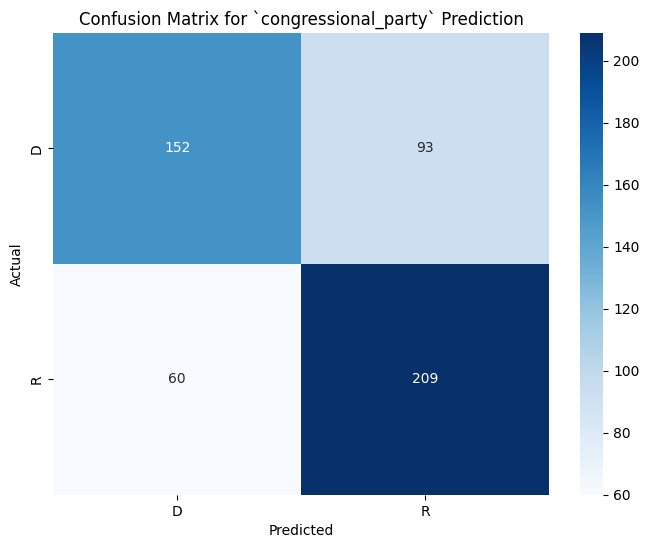

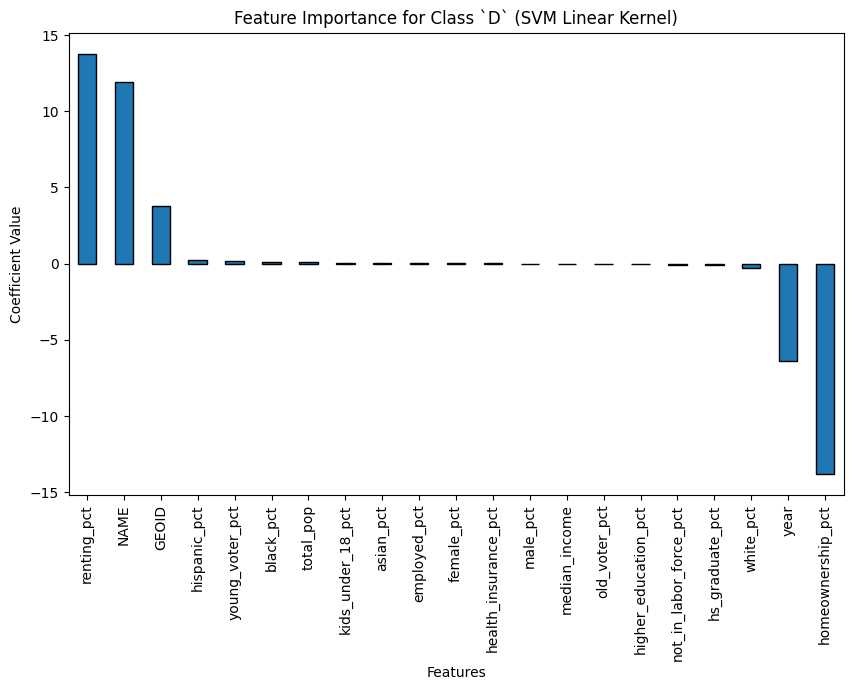

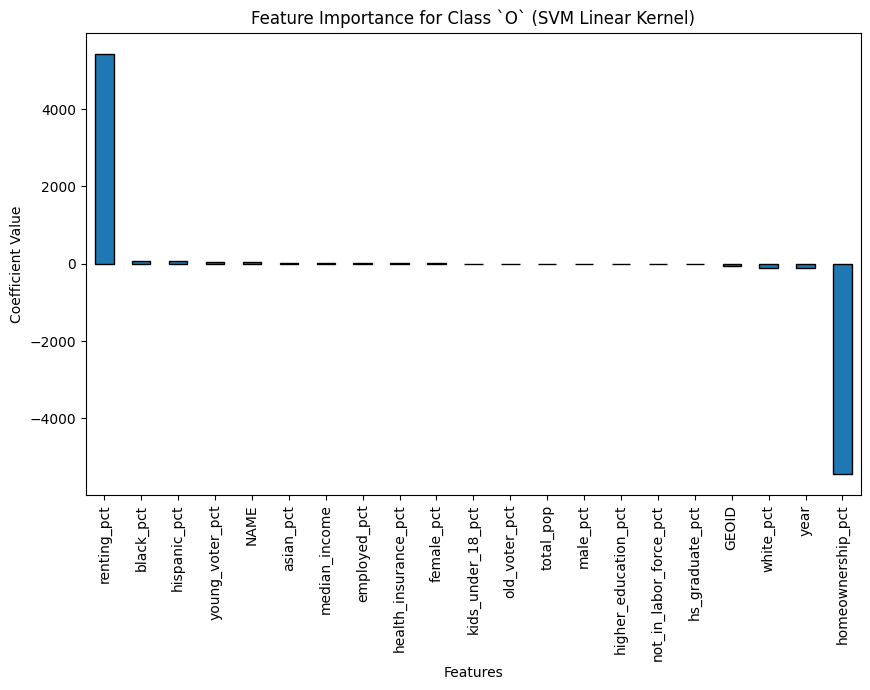

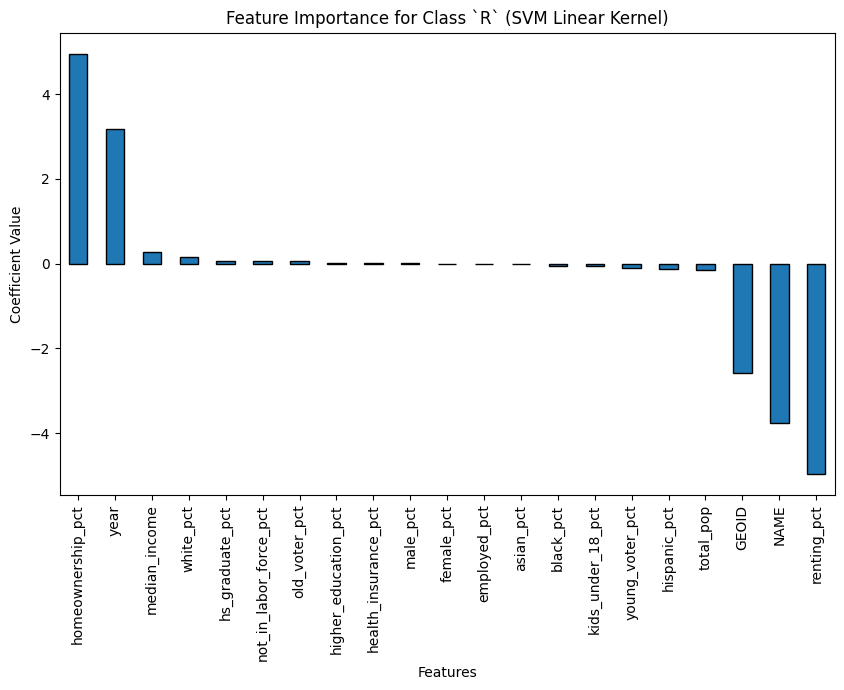

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
file_path = "merged_data_full(2012-2022).csv"
data = pd.read_csv(file_path)

# Encode the `congressional_party` column (target) and `NAME` column
label_encoders = {}
for col in ['congressional_party', 'NAME']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
features = data.drop(columns=['congressional_party', 'congressional_voter_turnout'])
target = data['congressional_party']

# Ensure all features are numeric
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Split data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train the Support Vector Classifier
model_svc = SVC(probability=True, kernel='linear', random_state=42)
model_svc.fit(train_features, train_target)

# Test the model
predictions = model_svc.predict(test_features)
accuracy = accuracy_score(test_target, predictions)

# Metrics and classification report
unique_classes = np.unique(test_target)  # Extract unique classes in the test target
print(f"Accuracy for `congressional_party` prediction using SVC: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(
    test_target, predictions,
    labels=unique_classes,  # Restrict labels to those present in the test set
    target_names=label_encoders['congressional_party'].inverse_transform(unique_classes)
))

# Confusion Matrix
conf_matrix = confusion_matrix(test_target, predictions, labels=unique_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['congressional_party'].inverse_transform(unique_classes),
            yticklabels=label_encoders['congressional_party'].inverse_transform(unique_classes))
plt.title("Confusion Matrix for `congressional_party` Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

coefficients = model_svc.coef_

# Iterate over each class and plot feature importance
classes = label_encoders['congressional_party'].classes_  # Get class names
for idx, class_label in enumerate(classes):
    feature_importance = pd.Series(coefficients[idx], index=features.columns).sort_values(ascending=False)

    # Plot for the current class
    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='bar', edgecolor='k')
    plt.title(f'Feature Importance for Class `{class_label}` (SVM Linear Kernel)')
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.show()


In [31]:
# Predict for Congressional District 22 (118th Congress), Texas
district_22 = data[(data["NAME"] == label_encoders['NAME'].transform(["Congressional District 22 (118th Congress), Texas"])[0]) & (data["year"] == 2022)]

if district_22.empty:
    raise ValueError("District 22 data for the year 2022 not found in the dataset.")

# Drop target columns to retain only features
district_22_features = district_22.drop(columns=['congressional_party', 'congressional_voter_turnout'])
district_22_features = district_22_features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Make prediction
district_22_prediction = model_svc.predict(district_22_features)[0]

# Decode prediction
congressional_party_predicted = label_encoders['congressional_party'].inverse_transform([district_22_prediction])[0]

# Display the result
print(f"Predicted `congressional_party` for District 22 in 2024: {congressional_party_predicted}")

Predicted `congressional_party` for District 22 in 2024: R


## SVM --> Support Vector Regressor - Congressional Elections

Mean Absolute Error (MAE): 0.08
R² Score: 0.48


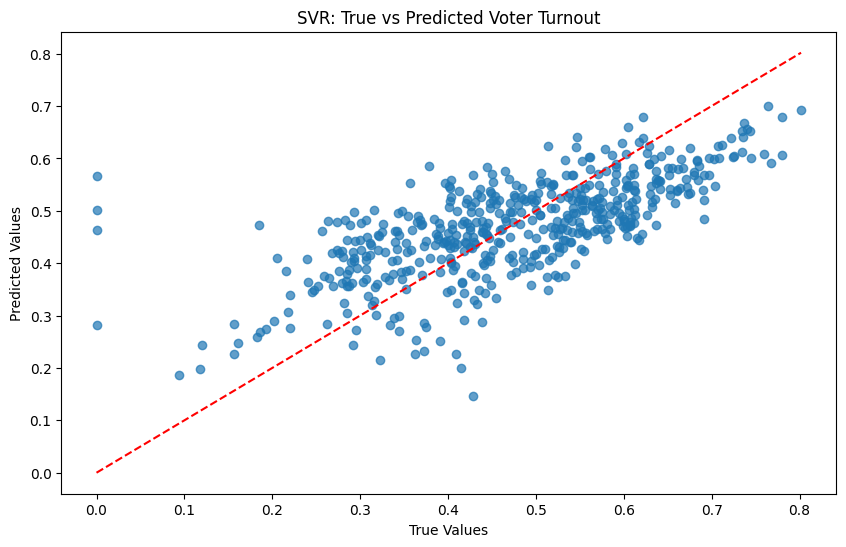

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
file_path = "merged_data_full(2012-2022).csv"
data = pd.read_csv(file_path)

# Encode the `NAME` column
label_encoder_name = LabelEncoder()
data['NAME'] = label_encoder_name.fit_transform(data['NAME'])

# Define features and target
features = data.drop(columns=['congressional_party', 'congressional_voter_turnout'])
target = data['congressional_voter_turnout']

# Ensure all features are numeric
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)

# Train the SVR model
model_svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model_svr.fit(train_features, train_target)

# Test the model
predictions = model_svr.predict(test_features)
mae = mean_absolute_error(test_target, predictions)
r2 = r2_score(test_target, predictions)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot true vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(test_target, predictions, alpha=0.7)
plt.plot([min(test_target), max(test_target)], [min(test_target), max(test_target)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("SVR: True vs Predicted Voter Turnout")
plt.show()


In [33]:
# Extract the row for District 22 in 2022
district_22 = data[(data["NAME"] == label_encoder_name.transform(["Congressional District 22 (118th Congress), Texas"])[0]) & (data["year"] == 2022)]

if district_22.empty:
    raise ValueError("District 22 data for the year 2022 not found in the dataset.")

# Prepare features for prediction
district_22_features = district_22.drop(columns=['congressional_party', 'congressional_voter_turnout'])
district_22_features_scaled = scaler.transform(district_22_features)

# Predict voter turnout
district_22_turnout_prediction = model_svr.predict(district_22_features_scaled)[0]

# Display the result
print(f"Predicted `congressional_voter_turnout` for District 22 in 2022: {district_22_turnout_prediction:.2f}")

Predicted `congressional_voter_turnout` for District 22 in 2022: 0.50


## Gradient Boosting (Classifier) - Presidential Elections

Accuracy for `pres_party` prediction using Gradient Boosting: 0.60

Classification Report:
               precision    recall  f1-score   support

           D       1.00      0.50      0.67         8
           R       0.33      1.00      0.50         2

    accuracy                           0.60        10
   macro avg       0.67      0.75      0.58        10
weighted avg       0.87      0.60      0.63        10



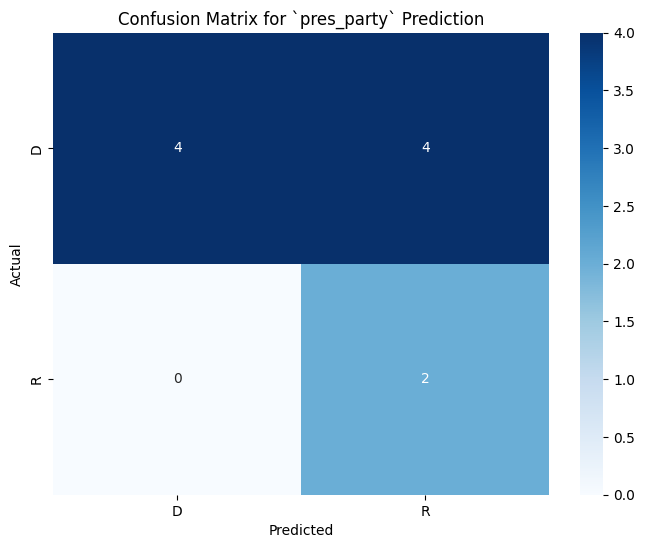

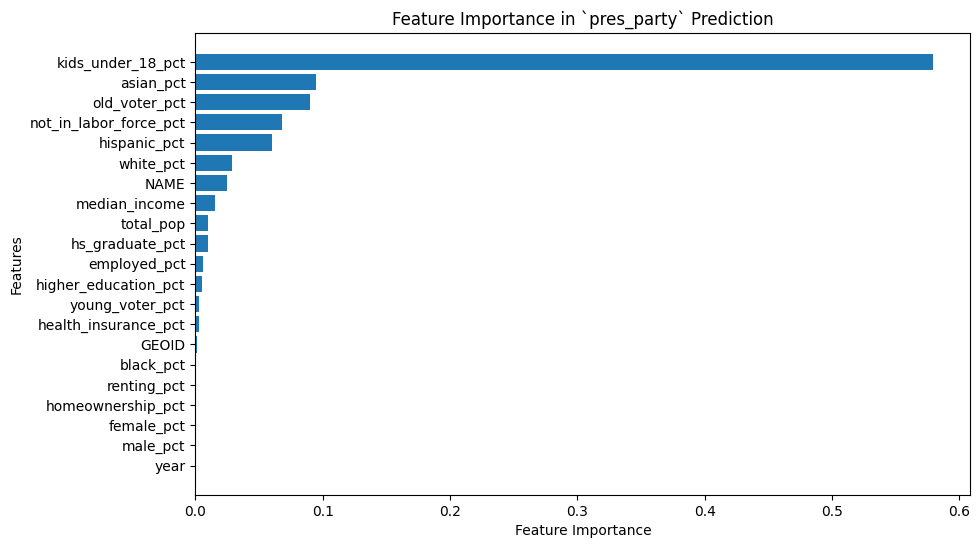

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
file_path = "full-pres-data-2012-2020.csv"
data = pd.read_csv(file_path)

# Encode categorical columns (e.g., 'pres_party', 'NAME')
label_encoders = {}
for col in ['pres_party', 'NAME']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
features = data.drop(columns=['congressional_party', 'congressional_voter_turnout', 'pres_party', 'pres_voter_turnout'])
target = data['pres_party']

# Ensure all features are numeric
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Split data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train the Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(train_features, train_target)

# Test the model
predictions = model_gb.predict(test_features)
accuracy = accuracy_score(test_target, predictions)

# Metrics and classification report
print(f"Accuracy for `pres_party` prediction using Gradient Boosting: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(
    test_target, predictions,
    target_names=label_encoders['pres_party'].classes_
))

# Confusion Matrix
conf_matrix = confusion_matrix(test_target, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['pres_party'].classes_,
            yticklabels=label_encoders['pres_party'].classes_)
plt.title("Confusion Matrix for `pres_party` Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

importances = model_gb.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
sorted_features = features.columns[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, importances[sorted_idx], align='center')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in `pres_party` Prediction")
plt.gca().invert_yaxis()
plt.show()


In [35]:
# Load the full dataset with all years
data_full = pd.read_csv("merged_data_full(2012-2022).csv")

# Extract the row for "Congressional District 22 (118th Congress), Texas" in 2022
district_22 = data_full[
    (data_full["NAME"] == "Congressional District 22 (118th Congress), Texas") & (data_full["year"] == 2022)
]

if district_22.empty:
    raise ValueError("District 22 data for the year 2022 not found in the dataset.")

# Encode the `NAME` column using the same LabelEncoder used during training
if "Congressional District 22 (118th Congress), Texas" not in label_encoders['NAME'].classes_:
    label_encoders['NAME'].classes_ = np.append(label_encoders['NAME'].classes_, "Congressional District 22 (118th Congress), Texas")

district_22.loc[:, 'NAME'] = label_encoders['NAME'].transform(district_22['NAME'])

# Drop target columns to retain only features
district_22_features = district_22.drop(columns=['congressional_party', 'congressional_voter_turnout'])
district_22_features = district_22_features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Make prediction for District 22
district_22_prediction = model_gb.predict(district_22_features)[0]

# Decode the prediction back to the original label
district_22_predicted_party = label_encoders['pres_party'].inverse_transform([district_22_prediction])[0]

# Display the result
print(f"Predicted `pres_party` for District 22 in 2022: {district_22_predicted_party}")

Predicted `pres_party` for District 22 in 2022: D


## Gradient Boosting (Regressor) - Presidential Elections

Mean Absolute Error (MAE): 0.12
R² Score: -0.68


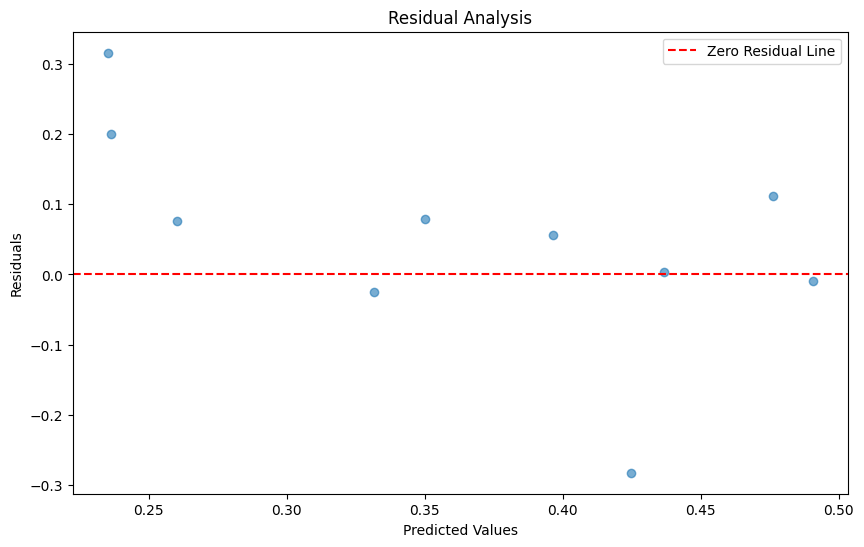

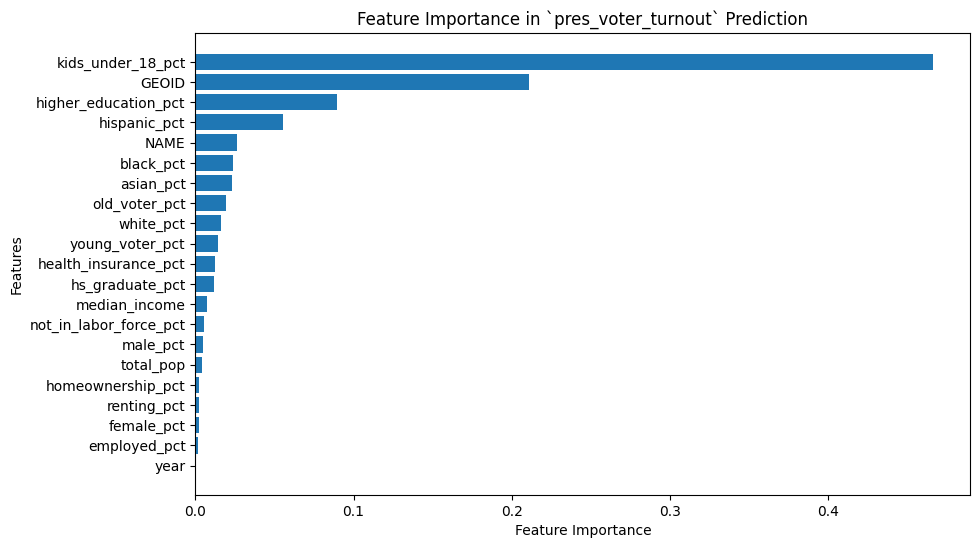

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load data
file_path = "full-pres-data-2012-2020.csv"
data = pd.read_csv(file_path)

# Encode the `NAME` column
from sklearn.preprocessing import LabelEncoder
label_encoder_name = LabelEncoder()
data['NAME'] = label_encoder_name.fit_transform(data['NAME'])

# Define features and target
features = data.drop(columns=['congressional_party', 'congressional_voter_turnout', 'pres_party', 'pres_voter_turnout'])
target = data['pres_voter_turnout']

# Ensure all features are numeric
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Split data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train the Gradient Boosting Regressor
model_gbr = GradientBoostingRegressor(random_state=42)
model_gbr.fit(train_features, train_target)

# Test the model
predictions = model_gbr.predict(test_features)
mae = mean_absolute_error(test_target, predictions)
r2 = r2_score(test_target, predictions)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Residual Analysis
residuals = test_target - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.legend()
plt.show()

# Feature Importance
importances = model_gbr.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
sorted_features = features.columns[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, importances[sorted_idx], align='center')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in `pres_voter_turnout` Prediction")
plt.gca().invert_yaxis()
plt.show()

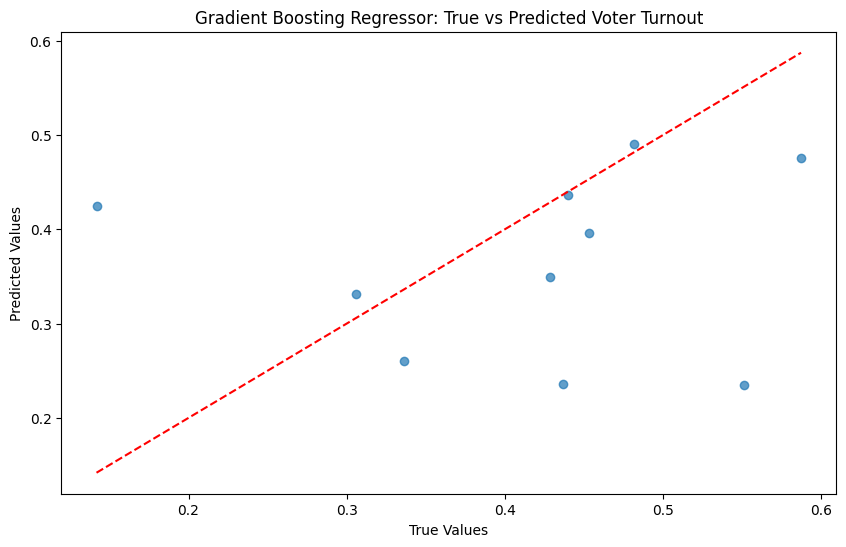

In [15]:
# Plot true vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(test_target, predictions, alpha=0.7)
plt.plot([min(test_target), max(test_target)], [min(test_target), max(test_target)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Regressor: True vs Predicted Voter Turnout")
plt.show()

In [37]:
# Predict for Congressional District 22 (118th Congress), Texas
data_full = pd.read_csv("merged_data_full(2012-2022).csv")
district_22 = data_full[(data_full["NAME"] == "Congressional District 22 (118th Congress), Texas") & (data_full["year"] == 2022)]

if district_22.empty:
    raise ValueError("District 22 data for the year 2022 not found in the dataset.")

# Encode the `NAME` column using the same LabelEncoder used during training
if "Congressional District 22 (118th Congress), Texas" not in label_encoder_name.classes_:
    label_encoder_name.classes_ = np.append(label_encoder_name.classes_, "Congressional District 22 (118th Congress), Texas")

district_22.loc[:, 'NAME'] = label_encoder_name.transform(district_22['NAME'])

# Drop target columns to retain only features
district_22_features = district_22.drop(columns=['congressional_party', 'congressional_voter_turnout'])
district_22_features = district_22_features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Predict voter turnout
district_22_voter_turnout_prediction = model_gbr.predict(district_22_features)[0]

# Display the result
print(f"Predicted `pres_voter_turnout` for District 22 in 2022: {district_22_voter_turnout_prediction:.2f}")

Predicted `pres_voter_turnout` for District 22 in 2022: 0.20


## Gradient Boosting (Classifier) - Congressional Elections

Accuracy for `congressional_party` prediction using Gradient Boosting: 0.89

Classification Report:
               precision    recall  f1-score   support

           D       0.90      0.89      0.89       245
           O       0.00      0.00      0.00         0
           R       0.90      0.90      0.90       269

    accuracy                           0.89       514
   macro avg       0.60      0.60      0.60       514
weighted avg       0.90      0.89      0.90       514



c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

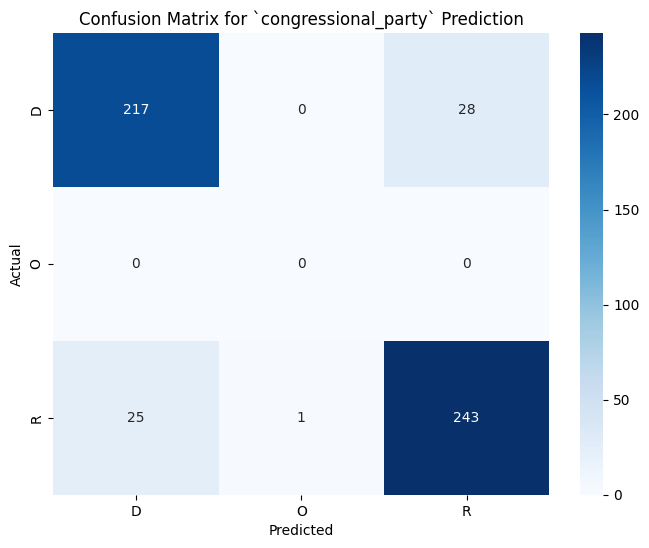

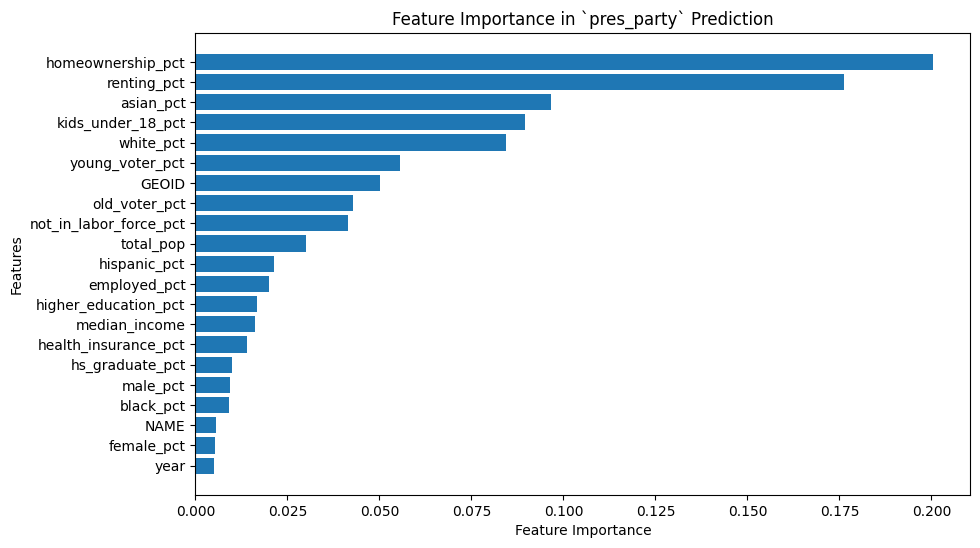

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
file_path = "merged_data_full(2012-2022).csv"
data = pd.read_csv(file_path)

# Encode categorical columns (e.g., 'congressional_party', 'NAME')
label_encoders = {}
for col in ['congressional_party', 'NAME']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
features = data.drop(columns=['congressional_party', 'congressional_voter_turnout'])
target = data['congressional_party']

# Ensure all features are numeric
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Split data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train the Gradient Boosting Classifier
model_gbc = GradientBoostingClassifier(random_state=42)
model_gbc.fit(train_features, train_target)

# Test the model
predictions = model_gbc.predict(test_features)
accuracy = accuracy_score(test_target, predictions)

# Metrics and classification report
print(f"Accuracy for `congressional_party` prediction using Gradient Boosting: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(
    test_target, predictions,
    target_names=label_encoders['congressional_party'].classes_
))

# Confusion Matrix
conf_matrix = confusion_matrix(test_target, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['congressional_party'].classes_,
            yticklabels=label_encoders['congressional_party'].classes_)
plt.title("Confusion Matrix for `congressional_party` Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

importances = model_gbc.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
sorted_features = features.columns[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, importances[sorted_idx], align='center')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in `pres_party` Prediction")
plt.gca().invert_yaxis()
plt.show()


In [39]:
# Predict for Congressional District 22 (118th Congress), Texas
data_full = pd.read_csv("merged_data_full(2012-2022).csv")
district_22 = data_full[(data_full["NAME"] == "Congressional District 22 (118th Congress), Texas") & (data_full["year"] == 2022)]

if district_22.empty:
    raise ValueError("District 22 data for the year 2022 not found in the dataset.")

# Encode the `NAME` column using the same LabelEncoder used during training
if "Congressional District 22 (118th Congress), Texas" not in label_encoders['NAME'].classes_:
    label_encoders['NAME'].classes_ = np.append(label_encoders['NAME'].classes_, "Congressional District 22 (118th Congress), Texas")

district_22.loc[:, 'NAME'] = label_encoders['NAME'].transform(district_22['NAME'])

# Drop target columns to retain only features
district_22_features = district_22.drop(columns=['congressional_party', 'congressional_voter_turnout'])
district_22_features = district_22_features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Predict congressional party
district_22_congressional_party_prediction = model_gbc.predict(district_22_features)[0]
district_22_congressional_party_decoded = label_encoders['congressional_party'].inverse_transform(
    [district_22_congressional_party_prediction]
)[0]

# Display the result
print(f"Predicted `congressional_party` for District 22 in 2024: {district_22_congressional_party_decoded}")


Predicted `congressional_party` for District 22 in 2024: R


## Gradient Boosting (Regressor) - Congressional Elections

Mean Absolute Error (MAE): 0.04
R² Score: 0.80


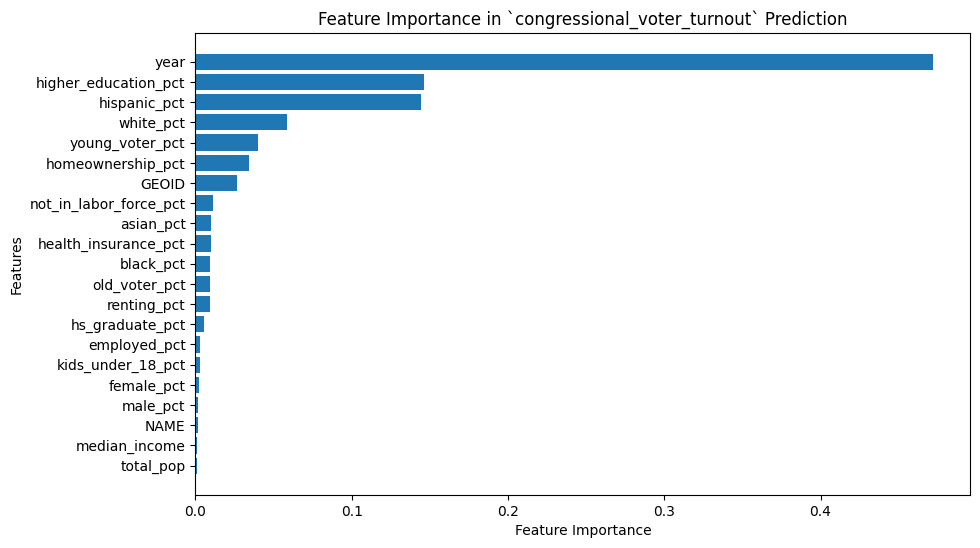

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load data
file_path = "merged_data_full(2012-2022).csv"
data = pd.read_csv(file_path)

# Encode the `NAME` column
label_encoder_name = LabelEncoder()
data['NAME'] = label_encoder_name.fit_transform(data['NAME'])

# Define features and target
features = data.drop(columns=['congressional_party', 'congressional_voter_turnout'])
target = data['congressional_voter_turnout']

# Ensure all features are numeric
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Split data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train the Gradient Boosting Regressor
model_gbr = GradientBoostingRegressor(random_state=42)
model_gbr.fit(train_features, train_target)

# Test the model
predictions = model_gbr.predict(test_features)
mae = mean_absolute_error(test_target, predictions)
r2 = r2_score(test_target, predictions)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature Importance
feature_importances = model_gbr.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = features.columns[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, feature_importances[sorted_idx], align='center')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in `congressional_voter_turnout` Prediction")
plt.gca().invert_yaxis()
plt.show()

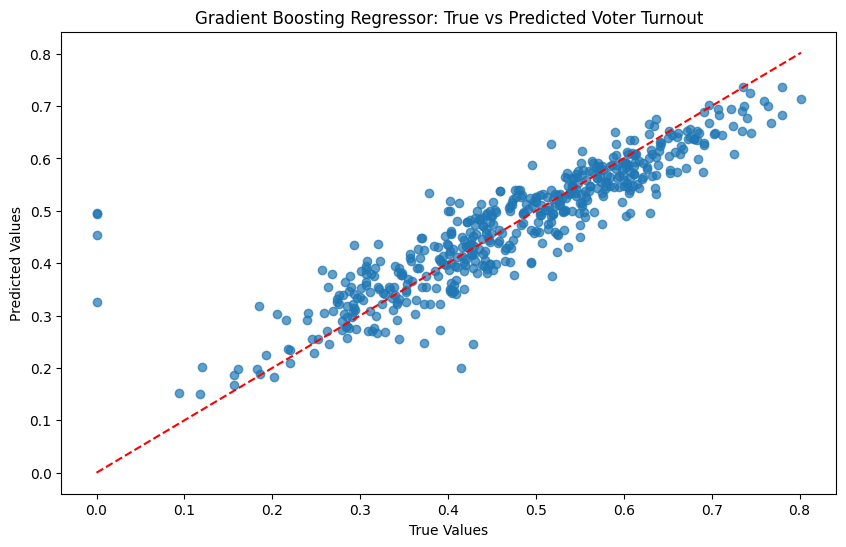

In [13]:
# Plot true vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(test_target, predictions, alpha=0.7)
plt.plot([min(test_target), max(test_target)], [min(test_target), max(test_target)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Regressor: True vs Predicted Voter Turnout")
plt.show()

In [41]:
# Predict for Congressional District 22 (118th Congress), Texas
data_full = pd.read_csv("merged_data_full(2012-2022).csv")
district_22 = data_full[(data_full["NAME"] == "Congressional District 22 (118th Congress), Texas") & (data_full["year"] == 2022)]

if district_22.empty:
    raise ValueError("District 22 data for the year 2022 not found in the dataset.")

# Add district to encoder if necessary
if "Congressional District 22 (118th Congress), Texas" not in label_encoder_name.classes_:
    label_encoder_name.classes_ = np.append(label_encoder_name.classes_, "Congressional District 22 (118th Congress), Texas")

district_22.loc[:, 'NAME'] = label_encoder_name.transform(district_22['NAME'])

# Drop target columns to retain only features
district_22_features = district_22.drop(columns=['congressional_party', 'congressional_voter_turnout'])
district_22_features = district_22_features.apply(pd.to_numeric, errors='coerce').fillna(0)

# Predict voter turnout
district_22_voter_turnout_prediction = model_gbr.predict(district_22_features)[0]

# Display the result
print(f"Predicted `congressional_voter_turnout` for District 22 in 2024: {district_22_voter_turnout_prediction:.2f}")

Predicted `congressional_voter_turnout` for District 22 in 2024: 0.41
